In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train1 = pd.read_csv('/home/user3/anaconda3/빅콘테스트/train_activity.csv')
train2 = pd.read_csv('/home/user3/anaconda3/빅콘테스트/train_combat.csv')
train3 = pd.read_csv('/home/user3/anaconda3/빅콘테스트/train_payment.csv')
train4 = pd.read_csv('/home/user3/anaconda3/빅콘테스트/train_pledge.csv')
train5 = pd.read_csv('/home/user3/anaconda3/빅콘테스트/train_trade.csv')
y_train = pd.read_csv('/home/user3/anaconda3/빅콘테스트/train_label.csv')

In [2]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601834 entries, 0 to 1601833
Data columns (total 17 columns):
day                  1601834 non-null int64
acc_id               1601834 non-null int64
char_id              1601834 non-null int64
server               1601834 non-null object
playtime             1601834 non-null float64
npc_kill             1601834 non-null float64
solo_exp             1601834 non-null float64
party_exp            1601834 non-null float64
quest_exp            1601834 non-null float64
rich_monster         1601834 non-null int64
death                1601834 non-null float64
revive               1601834 non-null float64
exp_recovery         1601834 non-null float64
fishing              1601834 non-null float64
private_shop         1601834 non-null float64
game_money_change    1601834 non-null float64
enchant_count        1601834 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 207.8+ MB


In [3]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574671 entries, 0 to 1574670
Data columns (total 13 columns):
day                    1574671 non-null int64
acc_id                 1574671 non-null int64
char_id                1574671 non-null int64
server                 1574671 non-null object
class                  1574671 non-null int64
level                  1574671 non-null int64
pledge_cnt             1574671 non-null float64
random_attacker_cnt    1574671 non-null float64
random_defender_cnt    1574671 non-null float64
temp_cnt               1574671 non-null float64
same_pledge_cnt        1574671 non-null float64
etc_cnt                1574671 non-null float64
num_opponent           1574671 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 156.2+ MB


In [4]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66432 entries, 0 to 66431
Data columns (total 3 columns):
day             66432 non-null int64
acc_id          66432 non-null int64
amount_spent    66432 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.5 MB


In [5]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083384 entries, 0 to 1083383
Data columns (total 15 columns):
day                     1083384 non-null int64
acc_id                  1083384 non-null int64
char_id                 1083384 non-null int64
server                  1083384 non-null object
pledge_id               1083384 non-null int64
play_char_cnt           1083384 non-null float64
combat_char_cnt         1083384 non-null float64
pledge_combat_cnt       1083384 non-null float64
random_attacker_cnt     1083384 non-null float64
random_defender_cnt     1083384 non-null float64
same_pledge_cnt         1083384 non-null float64
temp_cnt                1083384 non-null float64
etc_cnt                 1083384 non-null float64
combat_play_time        1083384 non-null float64
non_combat_play_time    1083384 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 124.0+ MB


In [6]:
train5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849325 entries, 0 to 1849324
Data columns (total 11 columns):
day               int64
time              object
type              int64
server            object
source_acc_id     int64
source_char_id    int64
target_acc_id     int64
target_char_id    int64
item_type         object
item_amount       float64
item_price        float64
dtypes: float64(2), int64(6), object(3)
memory usage: 155.2+ MB


In [7]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
acc_id           40000 non-null int64
survival_time    40000 non-null int64
amount_spent     40000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 937.6 KB


In [8]:
train1['acc_id'].value_counts()

40210     788
124737    689
68474     603
9289      574
33085     572
98393     530
14027     520
106819    511
94248     483
111023    471
89218     440
50413     439
77489     427
125945    424
18640     423
86784     411
91062     396
120428    395
33305     391
117833    386
80832     383
15847     380
68576     379
17351     376
62350     372
129153    371
21323     368
2232      353
90150     345
52924     337
         ... 
101053      1
89021       1
104142      1
63368       1
36674       1
100664      1
37973       1
26045       1
14774       1
75049       1
62737       1
84940       1
41401       1
109217      1
30698       1
104353      1
81589       1
79240       1
128400      1
127100      1
28504       1
48213       1
123816      1
122165      1
56756       1
76721       1
89787       1
74026       1
6413        1
22772       1
Name: acc_id, Length: 40000, dtype: int64

In [9]:
y_train.describe()

acc_id  survival_time  amount_spent
count   40000.000000   40000.000000  40000.000000
mean    65281.105550      45.706700      0.124931
std     37525.623536      23.265907      0.722272
min         2.000000       1.000000      0.000000
25%     32792.750000      24.000000      0.000000
50%     65359.000000      64.000000      0.020343
75%     97685.750000      64.000000      0.106119
max    130473.000000      64.000000     39.412632

In [59]:
# 잔존 고객 0, 이탈 고객 1
y_train['leave'] = 0
y_train['leave'][y_train.survival_time < 64] = 1

/home/user3/.conda/envs/hun/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
y_train['leave'].value_counts()

0    21996
1    18004
Name: leave, dtype: int64

In [61]:
# 결제 기록이 없으면 0, 결제 기록이 있으면 1
y_train['amount'] = 0
y_train['amount'][y_train.amount_spent > 0] = 1

/home/user3/.conda/envs/hun/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
y_train['amount'].value_counts()

1    23562
0    16438
Name: amount, dtype: int64

In [63]:
tab = pd.crosstab(index = y_train['leave'], columns = y_train['amount'],
                 rownames = ['leave'], colnames = ['amount'], margins = True)
tab

amount      0      1    All
leave                      
0        7361  14635  21996
1        9077   8927  18004
All     16438  23562  40000

In [64]:
y_train.groupby('leave')['amount_spent'].mean()

leave
0    0.086831
1    0.171480
Name: amount_spent, dtype: float64

In [65]:
y_train[y_train['amount_spent'] != y_train['amount_spent'].max()].groupby('leave')['amount_spent'].mean()

leave
0    0.086831
1    0.169301
Name: amount_spent, dtype: float64

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 42)
for train_index, test_index in split.split(y_train, y_train['leave']):
    strat_y_train = y_train.loc[train_index]
    strat_y_test = y_train.loc[test_index]

In [67]:
len(strat_y_train), len(strat_y_test)

(30000, 10000)

In [68]:
strat_y_train['leave'].mean(), strat_y_test['leave'].mean()

(0.4501, 0.4501)

In [69]:
y_test = strat_y_test.sort_values(['acc_id'], ascending = True)

In [27]:
pd.DataFrame(y_test['acc_id']).to_csv('test_index.csv', index = False)

In [70]:
train_id = strat_y_train['acc_id'].values

In [71]:
index_list = []
for i in range(0, len(train1)):
    if(train1['acc_id'][i] in train_id):
        index_list.append(i)

In [72]:
X_train1 = train1.loc[index_list]

In [73]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201885 entries, 0 to 1601833
Data columns (total 17 columns):
day                  1201885 non-null int64
acc_id               1201885 non-null int64
char_id              1201885 non-null int64
server               1201885 non-null object
playtime             1201885 non-null float64
npc_kill             1201885 non-null float64
solo_exp             1201885 non-null float64
party_exp            1201885 non-null float64
quest_exp            1201885 non-null float64
rich_monster         1201885 non-null int64
death                1201885 non-null float64
revive               1201885 non-null float64
exp_recovery         1201885 non-null float64
fishing              1201885 non-null float64
private_shop         1201885 non-null float64
game_money_change    1201885 non-null float64
enchant_count        1201885 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 165.1+ MB


In [74]:
X_train1.head(10)

day  acc_id  char_id server  playtime  npc_kill  solo_exp  party_exp  \
0     1   75001   397380     aa  1.441844  0.000000  0.000000   0.000000   
1     1   75001   216231     aa  0.283219  2.247978  0.047085   0.000000   
2     1   75711   308769     aa  1.036910  2.956638  0.321821   0.166593   
3     1   72230   387177     aa  0.229384  4.042102  0.099147   0.000000   
4     1   34253   339862     aa  1.088405  0.596802  0.003377   0.000000   
7     1   13896   302284     aa  0.004681  0.000000  0.000000   0.000000   
8     1   13896    95032     aa  0.414296  0.000000  0.000000   0.000000   
9     1   13896   374971     aa  0.007022  0.000000  0.000000   0.000000   
10    1   13896    10022     aa  0.002341  0.000000  0.000000   0.000000   
11    1   54399   393024     aa  0.884768  2.759281  0.004484   0.000042   

    quest_exp  rich_monster     death    revive  exp_recovery   fishing  \
0    0.000000             0  0.000000  0.000000           0.0  0.000000   
1    0.000000             0  0.000000  0.000000           0.0  0.000000   
2    0.003470             1  0.245883  0.247337           0.0  0.000000   
3    0.001735             0  0.000000  0.000000           0.0  0.000000   
4    0.000000             0  0.000000  0.000000           0.0  0.000000   
7    0.000000             0  0.000000  0.000000           0.0  0.000000   
8    0.000000             0  0.000000  0.000000           0.0  0.000000   
9    0.000000             0  0.000000  0.000000           0.0  0.000000   
10   0.000000             0  0.000000  0.000000           0.0  0.000000   
11   0.000108             1  0.000000  0.000000           0.0  0.382658   

    private_shop  game_money_change  enchant_count  
0        1.10514           0.034006            0.0  
1        0.00000          -0.013963            0.0  
2        0.00000          -0.001987            0.0  
3        0.00000          -0.028884            0.0  
4        0.00000           0.011777            0.0  
7        0.00000           0.000000            0.0  
8        0.00000          -0.000337            0.0  
9        0.00000          -0.141990            0.0  
10       0.00000           0.000000            0.0  
11       0.00000          -0.035734            0.0

In [75]:
X_train1 = pd.merge(X_train1, strat_y_train, how = 'left', on = 'acc_id')

In [76]:
X_train1 = X_train1.sort_values(['acc_id', 'char_id', 'day'], ascending = True)

In [77]:
X_train1[X_train1.acc_id == 5]

day  acc_id  char_id server  playtime  npc_kill  solo_exp  party_exp  \
906706    22       5    22260     aq  0.007022  0.000000  0.000000   0.000000   
949936    23       5    22260     aq  0.014044  0.000000  0.000000   0.000000   
992982    24       5    22260     aq  0.009363  0.000000  0.000000   0.000000   
1082623   26       5    22260     aq  0.007022  0.000000  0.000000   0.000000   
1128786   27       5    22260     aq  0.009363  0.000000  0.000000   0.000000   
906705    22       5   175813     aq  0.004681  0.000000  0.000000   0.000000   
949935    23       5   175813     aq  0.002341  0.000000  0.000000   0.000000   
992981    24       5   175813     aq  0.004681  0.000000  0.000000   0.000000   
353595     9       5   321231     aq  0.376845  0.158156  0.162334   0.000000   
566997    14       5   321231     aq  0.213000  0.152073  0.196963   0.000000   
821414    20       5   321231     aq  0.213000  0.162887  0.208784   0.000000   
906704    22       5   321231     aq  1.027548  0.523131  0.627042   0.000000   
949934    23       5   321231     aq  0.589845  0.360244  0.245681   0.000000   
992980    24       5   321231     aq  0.835614  0.320705  0.142434   0.584448   
1037083   25       5   321231     aq  0.678790  0.432901  0.243636   0.110838   
1082622   26       5   321231     aq  0.807526  0.338278  0.114747   0.000000   
1128785   27       5   321231     aq  0.727944  0.511979  0.135373   0.000000   
1176098   28       5   321231     aq  0.587504  0.276097  0.078441   0.000000   

         quest_exp  rich_monster  ...    revive  exp_recovery   fishing  \
906706    0.000000             0  ...  0.000000           0.0  0.000000   
949936    0.000000             0  ...  0.000000           0.0  0.000000   
992982    0.000000             0  ...  0.000000           0.0  0.000000   
1082623   0.000000             0  ...  0.000000           0.0  0.000000   
1128786   0.000000             0  ...  0.000000           0.0  0.000000   
906705    0.000000             0  ...  0.000000           0.0  0.000000   
949935    0.000000             0  ...  0.000000           0.0  0.000000   
992981    0.000000             0  ...  0.000000           0.0  0.000000   
353595    0.000000             1  ...  0.000000           0.0  0.000000   
566997    0.000000             1  ...  0.000000           0.0  0.000000   
821414    0.000000             1  ...  0.000000           0.0  0.000000   
906704    0.020823             1  ...  0.000000           0.0  0.000000   
949934    0.069409             1  ...  0.000000           0.0  0.021027   
992980    0.006941             1  ...  0.000000           0.0  0.000000   
1037083   0.003470             1  ...  0.000000           0.0  0.000000   
1082622   0.003470             1  ...  0.247337           0.0  0.370370   
1128785   0.003470             1  ...  0.000000           0.0  0.000000   
1176098   0.003470             0  ...  0.000000           0.0  3.051512   

         private_shop  game_money_change  enchant_count  survival_time  \
906706            0.0           0.000000            0.0             60   
949936            0.0           0.000000            0.0             60   
992982            0.0           0.000000            0.0             60   
1082623           0.0           0.000000            0.0             60   
1128786           0.0           0.000000            0.0             60   
906705            0.0           0.000000            0.0             60   
949935            0.0           0.000000            0.0             60   
992981            0.0           0.000000            0.0             60   
353595            0.0           0.005411            0.0             60   
566997            0.0           0.004499            0.0             60   
821414            0.0           0.011788            0.0             60   
906704            0.0          -0.084338            0.0             60   
949934            0.0           0.008328            0.0             60   
992980 

In [36]:
X_train1.groupby('leave')['playtime'].mean()

leave
0    1.099642
1    0.950144
Name: playtime, dtype: float64

In [37]:
X_train1.groupby('leave')['npc_kill'].mean()

leave
0    0.498060
1    0.487644
Name: npc_kill, dtype: float64

In [38]:
X_train1.groupby('leave')['solo_exp'].mean()

leave
0    0.151203
1    0.368146
Name: solo_exp, dtype: float64

In [39]:
X_train1.groupby('leave')['party_exp'].mean()

leave
0    0.062565
1    0.232729
Name: party_exp, dtype: float64

In [40]:
X_train1[X_train1.leave == 1].groupby('acc_id')['char_id'].count().mean()

33.89246834036881

In [41]:
X_train1[X_train1.leave == 0].groupby('acc_id')['char_id'].count().mean()

45.11335394314118

In [49]:
unique = X_train1[X_train1.leave == 1].groupby('acc_id')['char_id'].unique()

In [52]:
leave_unique_list = []
for i in range(0, len(unique)):
    leave_unique_list.append(len(unique.iloc[i]))

In [56]:
np.array(leave_unique_list).mean()

3.6539287565726135

In [57]:
unique = X_train1[X_train1.leave == 0].groupby('acc_id')['char_id'].unique()

In [58]:
not_leave_unique_list = []
for i in range(0, len(unique)):
    not_leave_unique_list.append(len(unique.iloc[i]))

In [59]:
np.array(not_leave_unique_list).mean()

3.9354428077832333

In [63]:
np.array(leave_unique_list).max()

229

In [64]:
np.array(not_leave_unique_list).max()

152

# 전투 데이터

In [148]:
index_list = []
for i in range(0, len(train2)):
    if(train2['acc_id'][i] in train_id):
        index_list.append(i)

In [149]:
X_train2 = train2.loc[index_list]

In [150]:
X_train2 = pd.merge(X_train2, strat_y_train, how = 'left', on = 'acc_id')

In [151]:
X_train2 = X_train2.sort_values(['acc_id', 'char_id', 'day'], ascending = True)

In [152]:
X_train2.head(20)

day  acc_id  char_id server  class  level  pledge_cnt  \
1084292    1       2   233598     au      1      0         0.0   
1087653    2       2   233598     au      1      0         0.0   
1126290    3       2   233598     au      1      0         0.0   
1160025    4       2   233598     au      1      0         0.0   
1163411    5       2   233598     au      1      0         0.0   
1166694    6       2   233598     au      1      0         0.0   
1170158    7       2   233598     au      1      0         0.0   
1173681    8       2   233598     au      1      0         0.0   
1177126    9       2   233598     au      1      0         0.0   
1180613   10       2   233598     au      1      0         0.0   
1091201   11       2   233598     au      1      0         0.0   
1094797   12       2   233598     au      1      0         0.0   
1098320   13       2   233598     au      1      0         0.0   
1101972   14       2   233598     au      1      0         0.0   
1105413   15       2   233598     au      1      0         0.0   
1108903   16       2   233598     au      1      0         0.0   
1112347   17       2   233598     au      1      0         0.0   
1115856   18       2   233598     au      1      0         0.0   
1119418   19       2   233598     au      1      0         0.0   
1122884   20       2   233598     au      1      0         0.0   

         random_attacker_cnt  random_defender_cnt  temp_cnt  same_pledge_cnt  \
1084292                  0.0                  0.0       0.0              0.0   
1087653                  0.0                  0.0       0.0              0.0   
1126290                  0.0                  0.0       0.0              0.0   
1160025                  0.0                  0.0       0.0              0.0   
1163411                  0.0                  0.0       0.0              0.0   
1166694                  0.0                  0.0       0.0              0.0   
1170158                  0.0                  0.0       0.0              0.0   
1173681                  0.0                  0.0       0.0              0.0   
1177126                  0.0                  0.0       0.0              0.0   
1180613                  0.0                  0.0       0.0              0.0   
1091201                  0.0                  0.0       0.0              0.0   
1094797                  0.0                  0.0       0.0              0.0   
1098320                  0.0                  0.0       0.0              0.0   
1101972                  0.0                  0.0       0.0              0.0   
1105413                  0.0                  0.0       0.0              0.0   
1108903                  0.0                  0.0       0.0              0.0   
1112347                  0.0                  0.0       0.0              0.0   
1115856                  0.0                  0.0       0.0              0.0   
1119418                  0.0                  0.0       0.0              0.0   
1122884                  0.0                  0.0       0.0              0.0   

         etc_cnt  num_opponent  survival_time  amount_spent  leave  amount  
1084292      0.0           0.0             64           0.0      0       0  
1087653      0.0           0.0             64           0.0      0       0  
1126290      0.0           0.0             64           0.0      0       0  
1160025      0.0           0.0             64           0.0      0       0  
1163411      0.0           0.0             64           0.0      0       0  
1166694      0.0           0.0             64           0.0      0       0  
1170158      0.0           0.0             64           0.0      0       0  
1173681      0.0           0.0             64           0.0      0       0  
1177126      0.0           0.0             64           0.0      0       0  
1180613      0.0           0.0             64           0.0      0       0  
1091201      0.0           0.0             64           0.0      0       0  
1094797      0.0 

In [153]:
X_train2.tail(20)

day  acc_id  char_id server  class  level  pledge_cnt  \
428420    7  130470   364642     ah      2     15    0.770211   
436265    9  130470   364642     ah      2     16    0.000000   
440237   10  130470   364642     ah      2     16    0.000000   
340334   11  130470   364642     ah      2     16    0.000000   
344413   12  130470   364642     ah      2     16    0.000000   
348398   13  130470   364642     ah      2     16    0.000000   
352426   14  130470   364642     ah      2     16    0.000000   
356387   15  130470   364642     ah      2     16    0.000000   
360322   16  130470   364642     ah      2     16    0.000000   
364161   17  130470   364642     ah      2     16    0.000000   
368054   18  130470   364642     ah      2     16    0.000000   
371970   19  130470   364642     ah      2     16    0.000000   
375881   20  130470   364642     ah      2     16    0.000000   
383660   21  130470   364642     ah      2     16    0.000000   
387729   22  130470   364642     ah      2     16    0.000000   
395693   24  130470   364642     ah      2     16    0.000000   
399847   25  130470   364642     ah      2     16    0.000000   
404130   26  130470   364642     ah      2     16    0.000000   
408341   27  130470   364642     ah      2     16    0.000000   
412766   28  130470   364642     ah      2     16    0.000000   

        random_attacker_cnt  random_defender_cnt  temp_cnt  same_pledge_cnt  \
428420                  0.0             0.000000       0.0              0.0   
436265                  0.0             0.000000       0.0              0.0   
440237                  0.0             0.000000       0.0              0.0   
340334                  0.0             0.000000       0.0              0.0   
344413                  0.0             0.000000       0.0              0.0   
348398                  0.0             0.000000       0.0              0.0   
352426                  0.0             0.000000       0.0              0.0   
356387                  0.0             0.000000       0.0              0.0   
360322                  0.0             0.000000       0.0              0.0   
364161                  0.0             0.000000       0.0              0.0   
368054                  0.0             2.366129       0.0              0.0   
371970                  0.0             0.000000       0.0              0.0   
375881                  0.0             1.183064       0.0              0.0   
383660                  0.0             0.000000       0.0              0.0   
387729                  0.0             0.000000       0.0              0.0   
395693                  0.0             0.000000       0.0              0.0   
399847                  0.0             0.000000       0.0              0.0   
404130                  0.0             0.000000       0.0              0.0   
408341                  0.0             0.000000       0.0              0.0   
412766                  0.0             0.000000       0.0              0.0   

         etc_cnt  num_opponent  survival_time  amount_spent  leave  amount  
428420  1.801784      1.079416             64      0.060208      0       1  
436265  0.000000      0.000000             64      0.060208      0       1  
440237  1.126115      0.588773             64      0.060208      0       1  
340334  0.563058      0.490644             64      0.060208      0       1  
344413  1.238727      0.883159             64      0.060208      0       1  
348398  1.238727      0.588773             64      0.060208      0       1  
352426  2.815288      0.785030             64      0.060208      0       1  
356387  2.364842      1.471931             64      0.060208      0       1  
360322  2.477454      0.785030             64      0.060208      0       1  
364161  3.490957      0.981288             64      0.060208      0       1  
368054  4.166626      0.981288             64      0.060208      0       1  
371970  3.040511      0.981288             64      0.06020

## leave

In [77]:
server_tab = pd.crosstab(index = X_train2['leave'], columns = X_train2['server'],
                 rownames = ['leave'], colnames = ['server'], margins = True)
server_tab

server     aa     ab     ac     ad     ae     af     ag     ah     ai     aj  \
leave                                                                          
0       29179  27648  24684  32659  21211  20098  24437  16398  23524  14225   
1       11952  14005  12066  17524  15593   9368  14512   6572   9940   8071   
All     41131  41653  36750  50183  36804  29466  38949  22970  33464  22296   

server  ...     bd    bj    bk    bl    bm    bn    bo    bp    br      All  
leave   ...                                                                  
0       ...  29140  7839  7525  7310  1093  1299   900  1006  1538   737636  
1       ...  63367  1121  1034  1050   163   213   150  1178   280   444074  
All     ...  92507  8960  8559  8360  1256  1512  1050  2184  1818  1181710  

[3 rows x 38 columns]

In [78]:
server_tab.iloc[1,:] / server_tab.iloc[2,:]

server
aa     0.290584
ab     0.336230
ac     0.328327
ad     0.349202
ae     0.423677
af     0.317926
ag     0.372590
ah     0.286112
ai     0.297036
aj     0.361993
ak     0.307070
al     0.296463
am     0.307080
an     0.391755
ao     0.331637
ap     0.283439
aq     0.290740
ar     0.394689
as     0.373983
at     0.309470
au     0.320064
av     0.293614
aw     0.303878
ax     0.369028
ay     0.462750
az     0.406392
bb     0.550193
bc     0.487223
bd     0.684997
bj     0.125112
bk     0.120809
bl     0.125598
bm     0.129777
bn     0.140873
bo     0.142857
bp     0.539377
br     0.154015
All    0.375789
dtype: float64

In [79]:
class_tab = pd.crosstab(index = X_train2['leave'], columns = X_train2['class'],
                 rownames = ['leave'], colnames = ['class'], margins = True)
class_tab

class      0       1       2       3       4      5      6       7      All
leave                                                                      
0      62260  174354  128505  102089   83944  57080  18183  111221   737636
1      35355   71404   72770   83693   74811  41500  12602   51939   444074
All    97615  245758  201275  185782  158755  98580  30785  163160  1181710

In [80]:
class_tab.iloc[1,:] / class_tab.iloc[2,:]

class
0      0.362188
1      0.290546
2      0.361545
3      0.450490
4      0.471236
5      0.420978
6      0.409355
7      0.318332
All    0.375789
dtype: float64

In [81]:
level_tab = pd.crosstab(index = X_train2['leave'], columns = X_train2['level'],
                 rownames = ['leave'], colnames = ['level'], margins = True)
level_tab

level      0      1      2      3      4      5      6     7     8      9  \
leave                                                                       
0      47102  22259  47263   9956   7530  13157  18453  4773  4275  10086   
1      14084   5407   9174   3739   2960   7870  11568  2703  2645   7621   
All    61186  27666  56437  13695  10490  21027  30021  7476  6920  17707   

level     10      11     12     13     14     15      16      17      All  
leave                                                                      
0      20375   64851  25051  24488  53379  44864  173167  146607   737636  
1      12266   40097  28675  30415  42585  53460  130527   38278   444074  
All    32641  104948  53726  54903  95964  98324  303694  184885  1181710

In [82]:
level_tab.iloc[1,:] / level_tab.iloc[2,:]

level
0      0.230183
1      0.195438
2      0.162553
3      0.273019
4      0.282173
5      0.374281
6      0.385330
7      0.361557
8      0.382225
9      0.430395
10     0.375785
11     0.382065
12     0.533727
13     0.553977
14     0.443760
15     0.543713
16     0.429798
17     0.207037
All    0.375789
dtype: float64

Text(0.5, 1.0, 'pledge_cnt')

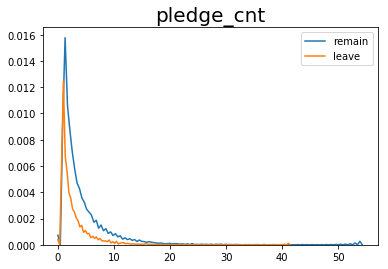

In [91]:
sns.kdeplot(X_train2.loc[X_train2['leave'] == 0, 'pledge_cnt'], label = 'remain')
sns.kdeplot(X_train2.loc[X_train2['leave'] == 1, 'pledge_cnt'], label = 'leave')
plt.title('pledge_cnt', fontsize = 20)

Text(0.5, 1.0, 'random_attacker_cnt')

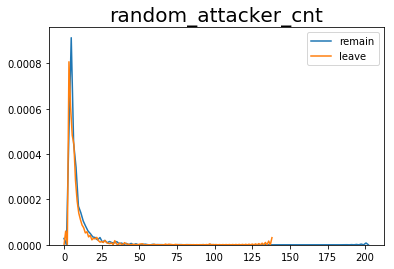

In [92]:
sns.kdeplot(X_train2.loc[X_train2['leave'] == 0, 'random_attacker_cnt'], label = 'remain')
sns.kdeplot(X_train2.loc[X_train2['leave'] == 1, 'random_attacker_cnt'], label = 'leave')
plt.title('random_attacker_cnt', fontsize = 20)

Text(0.5, 1.0, 'random_defender_cnt')

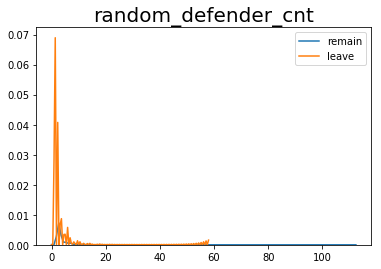

In [93]:
sns.kdeplot(X_train2.loc[X_train2['leave'] == 0, 'random_defender_cnt'], label = 'remain')
sns.kdeplot(X_train2.loc[X_train2['leave'] == 1, 'random_defender_cnt'], label = 'leave')
plt.title('random_defender_cnt', fontsize = 20)

Text(0.5, 1.0, 'temp_cnt')

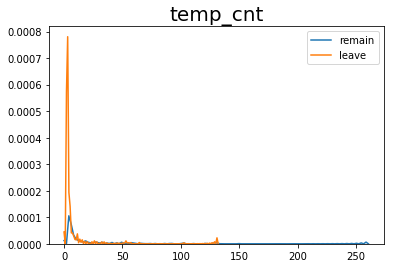

In [94]:
sns.kdeplot(X_train2.loc[X_train2['leave'] == 0, 'temp_cnt'], label = 'remain')
sns.kdeplot(X_train2.loc[X_train2['leave'] == 1, 'temp_cnt'], label = 'leave')
plt.title('temp_cnt', fontsize = 20)

Text(0.5, 1.0, 'same_pledge_cnt')

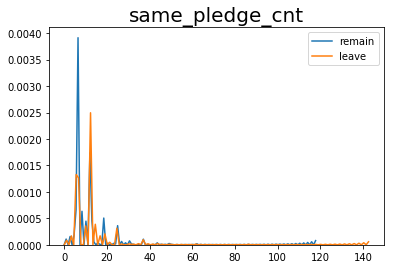

In [95]:
sns.kdeplot(X_train2.loc[X_train2['leave'] == 0, 'same_pledge_cnt'], label = 'remain')
sns.kdeplot(X_train2.loc[X_train2['leave'] == 1, 'same_pledge_cnt'], label = 'leave')
plt.title('same_pledge_cnt', fontsize = 20)

Text(0.5, 1.0, 'etc_cnt')

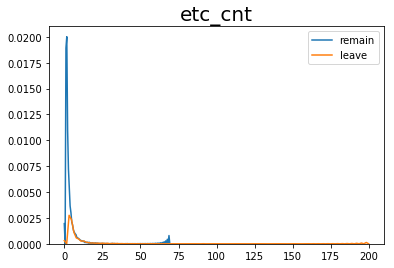

In [96]:
sns.kdeplot(X_train2.loc[X_train2['leave'] == 0, 'etc_cnt'], label = 'remain')
sns.kdeplot(X_train2.loc[X_train2['leave'] == 1, 'etc_cnt'], label = 'leave')
plt.title('etc_cnt', fontsize = 20)

Text(0.5, 1.0, 'num_opponent')

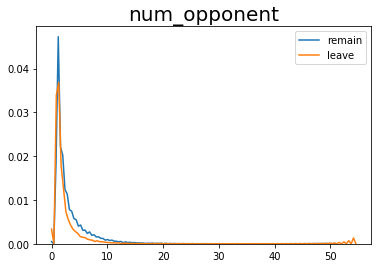

In [97]:
sns.kdeplot(X_train2.loc[X_train2['leave'] == 0, 'num_opponent'], label = 'remain')
sns.kdeplot(X_train2.loc[X_train2['leave'] == 1, 'num_opponent'], label = 'leave')
plt.title('num_opponent', fontsize = 20)

## amount

In [102]:
server_tab = pd.crosstab(index = X_train2['amount'], columns = X_train2['server'],
                 rownames = ['amount'], colnames = ['server'], margins = True)
server_tab

server     aa     ab     ac     ad     ae     af     ag     ah     ai     aj  \
amount                                                                         
0       12619  13277  10712  16266  13065   9923  12668   6346  11491   6937   
1       28512  28376  26038  33917  23739  19543  26281  16624  21973  15359   
All     41131  41653  36750  50183  36804  29466  38949  22970  33464  22296   

server  ...     bd    bj    bk    bl    bm    bn    bo    bp    br      All  
amount  ...                                                                  
0       ...  35882   275   229   206    24    45    26   231    84   392176  
1       ...  56625  8685  8330  8154  1232  1467  1024  1953  1734   789534  
All     ...  92507  8960  8559  8360  1256  1512  1050  2184  1818  1181710  

[3 rows x 38 columns]

In [103]:
server_tab.iloc[1,:] / server_tab.iloc[2,:]

server
aa     0.693200
ab     0.681247
ac     0.708517
ad     0.675866
ae     0.645011
af     0.663239
ag     0.674754
ah     0.723727
ai     0.656616
aj     0.688868
ak     0.689316
al     0.722670
am     0.683793
an     0.665649
ao     0.644200
ap     0.653598
aq     0.684650
ar     0.677406
as     0.679916
at     0.698257
au     0.678605
av     0.718076
aw     0.692273
ax     0.689254
ay     0.600979
az     0.657751
bb     0.437423
bc     0.446449
bd     0.612116
bj     0.969308
bk     0.973245
bl     0.975359
bm     0.980892
bn     0.970238
bo     0.975238
bp     0.894231
br     0.953795
All    0.668128
dtype: float64

In [104]:
class_tab = pd.crosstab(index = X_train2['amount'], columns = X_train2['class'],
                 rownames = ['amount'], colnames = ['class'], margins = True)
class_tab

class       0       1       2       3       4      5      6       7      All
amount                                                                      
0       31979   79930   51316   69448   65995  25940   5922   61646   392176
1       65636  165828  149959  116334   92760  72640  24863  101514   789534
All     97615  245758  201275  185782  158755  98580  30785  163160  1181710

In [105]:
class_tab.iloc[1,:] / class_tab.iloc[2,:]

class
0      0.672397
1      0.674761
2      0.745045
3      0.626186
4      0.584297
5      0.736863
6      0.807634
7      0.622175
All    0.668128
dtype: float64

In [106]:
level_tab = pd.crosstab(index = X_train2['amount'], columns = X_train2['level'],
                 rownames = ['amount'], colnames = ['level'], margins = True)
level_tab

level       0      1      2      3      4      5      6     7     8      9  \
amount                                                                       
0       42887  16894  39470   5666   3622   8305   7763  1293  1348   4261   
1       18299  10772  16967   8029   6868  12722  22258  6183  5572  13446   
All     61186  27666  56437  13695  10490  21027  30021  7476  6920  17707   

level      10      11     12     13     14     15      16      17      All  
amount                                                                      
0        8595   22969  16168  22803  30432  42974  102545   14181   392176  
1       24046   81979  37558  32100  65532  55350  201149  170704   789534  
All     32641  104948  53726  54903  95964  98324  303694  184885  1181710

In [107]:
level_tab.iloc[1,:] / level_tab.iloc[2,:]

level
0      0.299072
1      0.389359
2      0.300636
3      0.586272
4      0.654719
5      0.605032
6      0.741414
7      0.827047
8      0.805202
9      0.759361
10     0.736681
11     0.781139
12     0.699066
13     0.584668
14     0.682881
15     0.562935
16     0.662341
17     0.923298
All    0.668128
dtype: float64

Text(0.5, 1.0, 'pledge_cnt')

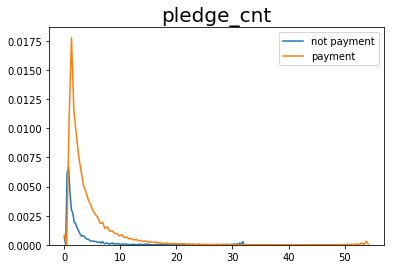

In [108]:
sns.kdeplot(X_train2.loc[X_train2['amount'] == 0, 'pledge_cnt'], label = 'not payment')
sns.kdeplot(X_train2.loc[X_train2['amount'] == 1, 'pledge_cnt'], label = 'payment')
plt.title('pledge_cnt', fontsize = 20)

Text(0.5, 1.0, 'random_attacker_cnt')

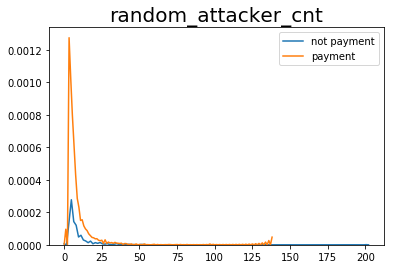

In [109]:
sns.kdeplot(X_train2.loc[X_train2['amount'] == 0, 'random_attacker_cnt'], label = 'not payment')
sns.kdeplot(X_train2.loc[X_train2['amount'] == 1, 'random_attacker_cnt'], label = 'payment')
plt.title('random_attacker_cnt', fontsize = 20)

Text(0.5, 1.0, 'random_defender_cnt')

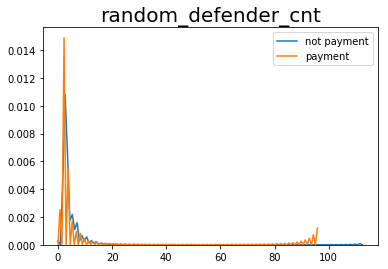

In [110]:
sns.kdeplot(X_train2.loc[X_train2['amount'] == 0, 'random_defender_cnt'], label = 'not payment')
sns.kdeplot(X_train2.loc[X_train2['amount'] == 1, 'random_defender_cnt'], label = 'payment')
plt.title('random_defender_cnt', fontsize = 20)

Text(0.5, 1.0, 'temp_cnt')

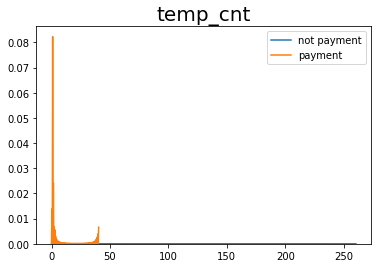

In [111]:
sns.kdeplot(X_train2.loc[X_train2['amount'] == 0, 'temp_cnt'], label = 'not payment')
sns.kdeplot(X_train2.loc[X_train2['amount'] == 1, 'temp_cnt'], label = 'payment')
plt.title('temp_cnt', fontsize = 20)

Text(0.5, 1.0, 'same_pledge_cnt')

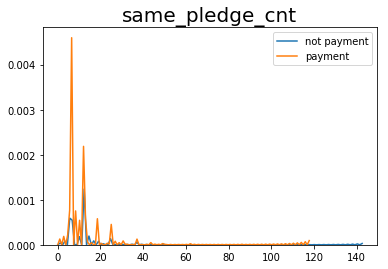

In [112]:
sns.kdeplot(X_train2.loc[X_train2['amount'] == 0, 'same_pledge_cnt'], label = 'not payment')
sns.kdeplot(X_train2.loc[X_train2['amount'] == 1, 'same_pledge_cnt'], label = 'payment')
plt.title('same_pledge_cnt', fontsize = 20)

Text(0.5, 1.0, 'etc_cnt')

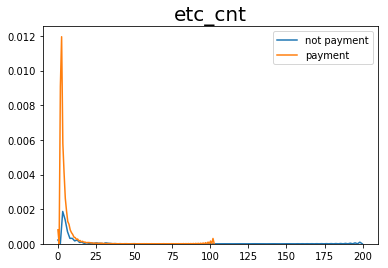

In [113]:
sns.kdeplot(X_train2.loc[X_train2['amount'] == 0, 'etc_cnt'], label = 'not payment')
sns.kdeplot(X_train2.loc[X_train2['amount'] == 1, 'etc_cnt'], label = 'payment')
plt.title('etc_cnt', fontsize = 20)

Text(0.5, 1.0, 'num_opponent')

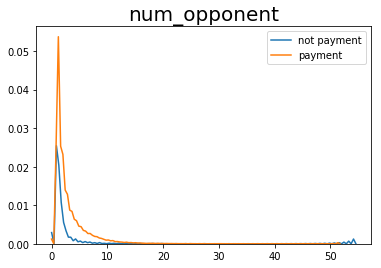

In [114]:
sns.kdeplot(X_train2.loc[X_train2['amount'] == 0, 'num_opponent'], label = 'not payment')
sns.kdeplot(X_train2.loc[X_train2['amount'] == 1, 'num_opponent'], label = 'payment')
plt.title('num_opponent', fontsize = 20)

# 결제 데이터

In [162]:
index_list = []
for i in range(0, len(train3)):
    if(train3['acc_id'][i] in train_id):
        index_list.append(i)

In [163]:
X_train3 = train3.loc[index_list]

In [164]:
X_train3 = pd.merge(X_train3, strat_y_train, how = 'left', on = 'acc_id')

In [165]:
X_train3 = X_train3.sort_values(['acc_id', 'day'], ascending = True)

In [166]:
X_train3.head(20)

day  acc_id  amount_spent_x  survival_time  amount_spent_y  leave  \
8691     1       8        1.056123             64        0.020310      0   
8692    26       8        0.348521             64        0.020310      0   
47157   17      21        2.346940             64        0.184267      0   
47158   26      21        0.348521             64        0.184267      0   
1635     7      38        0.442398             64        0.517168      0   
1636    12      38        0.586735             64        0.517168      0   
1637    23      38        5.280616             64        0.517168      0   
41286   28      41        0.035204              3        0.000000      1   
39700    1      43        3.696431             64        0.356197      0   
31046    2      53        0.477602             64        0.017160      0   
31047    4      53        0.023469             64        0.017160      0   
6069    19      63        0.058674             22        0.067853      1   
6070    21      63        0.528062             22        0.067853      1   
6071    22      63        1.056123             22        0.067853      1   
6072    28      63        0.117347             22        0.067853      1   
10931    8      66        0.348521             42        0.033763      1   
10932   13      66        0.011735             42        0.033763      1   
6494     6      67        2.112246             64        0.230859      0   
6495     7      67        1.430460             64        0.230859      0   
6496    27      67        1.396429             64        0.230859      0   

       amount  
8691        1  
8692        1  
47157       1  
47158       1  
1635        1  
1636        1  
1637        1  
41286       0  
39700       1  
31046       1  
31047       1  
6069        1  
6070        1  
6071        1  
6072        1  
10931       1  
10932       1  
6494        1  
6495        1  
6496        1

## leave

Text(0.5, 1.0, 'amount_spent_x')

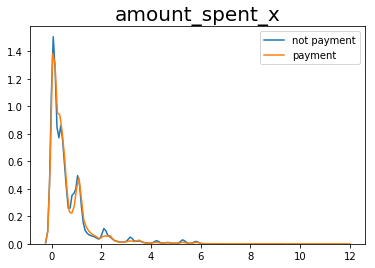

In [123]:
sns.kdeplot(X_train3.loc[X_train3['leave'] == 0, 'amount_spent_x'], label = 'not payment')
sns.kdeplot(X_train3.loc[X_train3['leave'] == 1, 'amount_spent_x'], label = 'payment')
plt.title('amount_spent_x', fontsize = 20)

## amount

Text(0.5, 1.0, 'amount_spent_x')

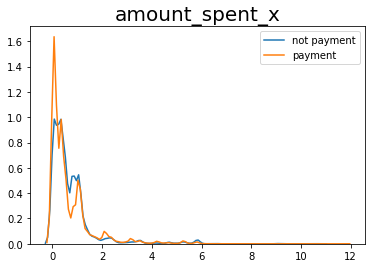

In [124]:
sns.kdeplot(X_train3.loc[X_train3['amount'] == 0, 'amount_spent_x'], label = 'not payment')
sns.kdeplot(X_train3.loc[X_train3['amount'] == 1, 'amount_spent_x'], label = 'payment')
plt.title('amount_spent_x', fontsize = 20)

### 파생변수
28일 동안 결제 횟수, 1회 결제시 결제 금액

# 혈맹 데이터

In [125]:
index_list = []
for i in range(0, len(train4)):
    if(train4['acc_id'][i] in train_id):
        index_list.append(i)

In [126]:
X_train4 = train4.loc[index_list]

In [127]:
X_train4 = pd.merge(X_train4, strat_y_train, how = 'left', on = 'acc_id')

In [128]:
X_train4 = X_train4.sort_values(['acc_id', 'char_id', 'day'], ascending = True)

In [129]:
X_train4.head(20)

day  acc_id  char_id server  pledge_id  play_char_cnt  \
611797   22       5    22260     aq      28441       0.036089   
641071   23       5    22260     aq      28441       0.072179   
670546   24       5    22260     aq      28441       0.036089   
731667   26       5    22260     aq      28441       0.036089   
763050   27       5    22260     aq      28441       0.072179   
611800   22       5   175813     aq      17370       0.072179   
641074   23       5   175813     aq      17370       0.072179   
670549   24       5   175813     aq      17370       0.072179   
235335    9       5   321231     aq      25467       0.649608   
379931   14       5   321231     aq      25467       0.396983   
554252   20       5   321231     aq      25467       0.505250   
611970   22       5   321231     aq      25467       0.613518   
641242   23       5   321231     aq      25467       0.396983   
670717   24       5   321231     aq      25467       0.541340   
700770   25       5   321231     aq      25467       0.505250   
731861   26       5   321231     aq      25467       0.505250   
763238   27       5   321231     aq      25467       0.577429   
795420   28       5   321231     aq      25467       0.396983   
12146     1       8    43437     ao      28140       2.417984   
67121     3       8    43437     ao      28140       2.129270   

        combat_char_cnt  pledge_combat_cnt  random_attacker_cnt  \
611797         0.000000            0.00000             0.000000   
641071         0.000000            0.00000             0.000000   
670546         0.000000            0.00000             0.000000   
731667         0.000000            0.00000             0.000000   
763050         0.000000            0.00000             0.000000   
611800         0.000000            0.00000             0.000000   
641074         0.000000            0.00000             0.000000   
670549         0.000000            0.00000             0.000000   
235335         0.252625            0.00000             0.000000   
379931         0.180447            0.00000             0.000000   
554252         0.108268            0.00000             0.000000   
611970         0.252625            0.00000             0.548695   
641242         0.036089            0.00000             0.710075   
670717         0.108268            0.00000             0.000000   
700770         0.108268            0.00000             0.000000   
731861         0.288715            0.00000             0.000000   
763238         0.144357            0.00000             0.677799   
795420         0.108268            0.00000             0.000000   
12146          0.469161            0.02914             0.000000   
67121          0.541340            0.00000             1.872017   

        random_defender_cnt  same_pledge_cnt  temp_cnt   etc_cnt  \
611797             0.000000         0.000000  0.000000  0.000000   
641071             0.000000         0.000000  0.000000  0.000000   
670546             0.000000         0.000000  0.000000  0.000000   
731667             0.000000         0.000000  0.000000  0.000000   
763050             0.000000         0.000000  0.000000  0.000000   
611800             0.000000         0.000000  0.000000  0.000000   
641074             0.000000         0.000000  0.000000  0.000000   
670549             0.000000         0.000000  0.000000  0.000000   
235335             0.143063         0.000000  0.692181  0.120331   
379931             0.000000         0.000000  0.197766  0.219426   
554252             0.071531         0.000000  0.296649  0.056626   
611970             0.357657         0.000000  0.098883  0.092017   
641242             0.000000         0.000000  0.000000  0.000000   
670717             0.000000         0.000000  0.593298  0.021235   
700770             0.071531         0.000000  0.296649  0.106174   
731861             0.000000         0.000000  0.098883  0.141565   
763238             0.143063         0.000000  0.098883  0.000000   
795420    

## leave

In [131]:
pledge_tab = pd.crosstab(index = X_train4['leave'], columns = X_train4['pledge_id'],
                 rownames = ['leave'], colnames = ['level'], margins = True)
pledge_tab

level  2    3  4  8  12  14  17  18  20  21  ...  39611  39613  39615  39616  \
leave                                        ...                               
0      0  266  0  9  30   0   0   0   0  19  ...      1      0      0     17   
1      2  166  2  0   0   2  31  12   5   0  ...      0     22     45      0   
All    2  432  2  9  30   2  31  12   5  19  ...      1     22     45     17   

level  39618  39621  39622  39623  39625     All  
leave                                             
0        357     13      0      0      1  483554  
1         23      0     14    252      0  330136  
All      380     13     14    252      1  813690  

[3 rows x 17895 columns]

Text(0.5, 1.0, 'play_char_cnt')

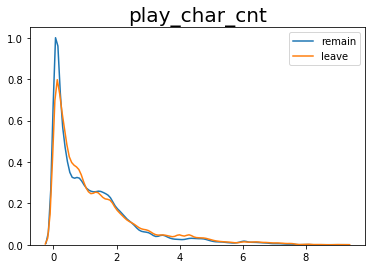

In [134]:
sns.kdeplot(X_train4.loc[X_train4['leave'] == 0, 'play_char_cnt'], label = 'remain')
sns.kdeplot(X_train4.loc[X_train4['leave'] == 1, 'play_char_cnt'], label = 'leave')
plt.title('play_char_cnt', fontsize = 20)

# 주차별로 데이터 통합

In [140]:
train_id.sort()
train_id

array([     2,      5,      8, ..., 130468, 130469, 130470])

In [198]:
def divide_by_week(data, variable):
    '''데이터와 변수를 넣으면 각 유저 아이디에 대한 주차별 변수의 합을 구함'''
    week_1 = np.zeros(30000)
    week_2 = np.zeros(30000)
    week_3 = np.zeros(30000)
    week_4 = np.zeros(30000)
    for i in range(0, len(train_id)):
        data_sub = data[data['acc_id'] == train_id[i]]
        week_1[i] = data_sub[(data_sub['day'] >= 1) & (data_sub['day'] <= 7)][variable].sum()
        week_2[i] = data_sub[(data_sub['day'] >= 8) & (data_sub['day'] <= 14)][variable].sum()
        week_3[i] = data_sub[(data_sub['day'] >= 15) & (data_sub['day'] <= 21)][variable].sum()
        week_4[i] = data_sub[(data_sub['day'] >= 22) & (data_sub['day'] <= 28)][variable].sum()
    print(variable, 'done')
        
    return week_1, week_2, week_3, week_4

In [166]:
playtime_1, playtime_2, playtime_3, playtime_4 = divide_by_week(data = X_train1, variable = 'playtime')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [167]:
npc_kill_1, npc_kill_2, npc_kill_3, npc_kill_4 = divide_by_week(data = X_train1, variable = 'npc_kill')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [168]:
solo_exp_1, solo_exp_2, solo_exp_3, solo_exp_4 = divide_by_week(data = X_train1, variable = 'solo_exp')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [170]:
quest_exp_1, quest_exp_2, quest_exp_3, quest_exp_4 = divide_by_week(data = X_train1, variable = 'quest_exp')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [175]:
rich_monster_1, rich_monster_2, rich_monster_3, rich_monster_4 = divide_by_week(data = X_train1, variable = 'rich_monster')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [176]:
death_1, death_2, death_3, death_4 = divide_by_week(data = X_train1, variable = 'death')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [177]:
revive_1, revive_2, revive_3, revive_4 = divide_by_week(data = X_train1, variable = 'revive')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [178]:
exp_recovery_1, exp_recovery_2, exp_recovery_3, exp_recovery_4 = divide_by_week(data = X_train1, variable = 'exp_recovery')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [179]:
fishing_1, fishing_2, fishing_3, fishing_4 = divide_by_week(data = X_train1, variable = 'fishing')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [180]:
private_shop_1, private_shop_2, private_shop_3, private_shop_4 = divide_by_week(data = X_train1, variable = 'private_shop')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [181]:
game_money_change_1, game_money_change_2, game_money_change_3, game_money_change_4 = divide_by_week(data = X_train1, variable = 'game_money_change')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [182]:
enchant_count_1, enchant_count_2, enchant_count_3, enchant_count_4 = divide_by_week(data = X_train1, variable = 'enchant_count')

1000 sample done
2000 sample done
3000 sample done
4000 sample done
5000 sample done
6000 sample done
7000 sample done
8000 sample done
9000 sample done
10000 sample done
11000 sample done
12000 sample done
13000 sample done
14000 sample done
15000 sample done
16000 sample done
17000 sample done
18000 sample done
19000 sample done
20000 sample done
21000 sample done
22000 sample done
23000 sample done
24000 sample done
25000 sample done
26000 sample done
27000 sample done
28000 sample done
29000 sample done
30000 sample done


In [201]:
train1_col = train1.columns[4:]
train2_col = train2.columns[6:]
train4_col = train4.columns[5:]

print(train1_col)
print(train2_col)
print(train4_col)

Index(['playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'rich_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count'],
      dtype='object')
Index(['pledge_cnt', 'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent'],
      dtype='object')
Index(['play_char_cnt', 'combat_char_cnt', 'pledge_combat_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'same_pledge_cnt',
       'temp_cnt', 'etc_cnt', 'combat_play_time', 'non_combat_play_time'],
      dtype='object')


In [202]:
dic = {}

for var_name in train1_col:
    week_1, week_2, week_3, week_4 = divide_by_week(data = train1, variable = var_name)
    key_1 = var_name + '_1'
    key_2 = var_name + '_2'
    key_3 = var_name + '_3'
    key_4 = var_name + '_4'
    dic[key_1] = week_1
    dic[key_2] = week_2
    dic[key_3] = week_3
    dic[key_4] = week_4

playtime done
npc_kill done
solo_exp done
party_exp done
quest_exp done
rich_monster done
death done
revive done
exp_recovery done
fishing done
private_shop done
game_money_change done
enchant_count done


In [203]:
for var_name in train2_col:
    week_1, week_2, week_3, week_4 = divide_by_week(data = train2, variable = var_name)
    key_1 = 'combat_' + var_name + '_1'
    key_2 = 'combat_' + var_name + '_2'
    key_3 = 'combat_' + var_name + '_3'
    key_4 = 'combat_' + var_name + '_4'
    dic[key_1] = week_1
    dic[key_2] = week_2
    dic[key_3] = week_3
    dic[key_4] = week_4

pledge_cnt done
random_attacker_cnt done
random_defender_cnt done
temp_cnt done
same_pledge_cnt done
etc_cnt done
num_opponent done


In [204]:
for var_name in train4_col:
    week_1, week_2, week_3, week_4 = divide_by_week(data = X_train4, variable = var_name)
    key_1 = var_name + '_1'
    key_2 = var_name + '_2'
    key_3 = var_name + '_3'
    key_4 = var_name + '_4'
    dic[key_1] = week_1
    dic[key_2] = week_2
    dic[key_3] = week_3
    dic[key_4] = week_4

play_char_cnt done
combat_char_cnt done
pledge_combat_cnt done
random_attacker_cnt done
random_defender_cnt done
same_pledge_cnt done
temp_cnt done
etc_cnt done
combat_play_time done
non_combat_play_time done


In [208]:
print(len(dic.keys()))
dic.keys()

120


dict_keys(['playtime_1', 'playtime_2', 'playtime_3', 'playtime_4', 'npc_kill_1', 'npc_kill_2', 'npc_kill_3', 'npc_kill_4', 'solo_exp_1', 'solo_exp_2', 'solo_exp_3', 'solo_exp_4', 'party_exp_1', 'party_exp_2', 'party_exp_3', 'party_exp_4', 'quest_exp_1', 'quest_exp_2', 'quest_exp_3', 'quest_exp_4', 'rich_monster_1', 'rich_monster_2', 'rich_monster_3', 'rich_monster_4', 'death_1', 'death_2', 'death_3', 'death_4', 'revive_1', 'revive_2', 'revive_3', 'revive_4', 'exp_recovery_1', 'exp_recovery_2', 'exp_recovery_3', 'exp_recovery_4', 'fishing_1', 'fishing_2', 'fishing_3', 'fishing_4', 'private_shop_1', 'private_shop_2', 'private_shop_3', 'private_shop_4', 'game_money_change_1', 'game_money_change_2', 'game_money_change_3', 'game_money_change_4', 'enchant_count_1', 'enchant_count_2', 'enchant_count_3', 'enchant_count_4', 'combat_pledge_cnt_1', 'combat_pledge_cnt_2', 'combat_pledge_cnt_3', 'combat_pledge_cnt_4', 'combat_random_attacker_cnt_1', 'combat_random_attacker_cnt_2', 'combat_random_at

In [217]:
data_array = train_id.copy()
data_array = data_array.reshape(-1, 1)

for key in dic.keys():
    data_array = np.concatenate([data_array, dic[key].reshape(-1, 1)], axis = 1)

In [218]:
data_array.shape

(30000, 121)

In [275]:
colnames = ['acc_id']
colnames.extend(list(dic.keys())[0:])

data = pd.DataFrame(data_array)
data.columns = colnames
data.head()

acc_id  playtime_1  playtime_2  playtime_3  playtime_4  npc_kill_1  \
0     2.0   22.919696   22.980553   22.659883   22.973531    0.000000   
1     5.0    0.000000    0.589845    0.213000    5.313287    0.000000   
2     8.0    4.987936    4.889629    4.653223    4.267014   26.808113   
3    17.0    5.406914    9.048973    7.831832    6.176989   25.931158   
4    21.0    6.048253    7.363701    4.966870    3.452466    4.379366   

   npc_kill_2  npc_kill_3  npc_kill_4  solo_exp_1  ...  etc_cnt_3  etc_cnt_4  \
0    0.000000    0.000000    0.000000    0.000000  ...   0.000000   0.000000   
1    0.310229    0.162887    2.763336    0.000000  ...   0.056626   0.417618   
2    1.325063    1.444694    1.594739   28.720862  ...  15.897784   6.243030   
3    1.328780    1.362575    1.834339    4.197880  ...   3.192298   2.526941   
4    4.602406    0.654252    1.135141   14.917062  ...   0.000000   0.014157   

   combat_play_time_1  combat_play_time_2  combat_play_time_3  \
0            0.000000            0.000000            0.000000   
1            0.000000            0.841744            0.593982   
2           41.123841           32.458405           33.515247   
3           18.502734           17.420872           14.629460   
4            0.228187            0.037182            0.149190   

   combat_play_time_4  non_combat_play_time_1  non_combat_play_time_2  \
0            0.000000                0.000000                0.000000   
1            3.661882                0.000000                0.000000   
2           29.782361                0.021776                0.000347   
3           15.140507                0.000000                0.000000   
4            0.087337                0.079228                0.408073   

   non_combat_play_time_3  non_combat_play_time_4  
0                0.000000                0.000000  
1                0.000000                0.004402  
2                0.010656                0.001042  
3                0.000000                0.000000  
4                0.218226                0.169577  

[5 rows x 121 columns]

In [276]:
strat_y_train.index = range(0, len(strat_y_train))

data = pd.merge(data, strat_y_train, how = 'left', on = 'acc_id')
data.head()

acc_id  playtime_1  playtime_2  playtime_3  playtime_4  npc_kill_1  \
0     2.0   22.919696   22.980553   22.659883   22.973531    0.000000   
1     5.0    0.000000    0.589845    0.213000    5.313287    0.000000   
2     8.0    4.987936    4.889629    4.653223    4.267014   26.808113   
3    17.0    5.406914    9.048973    7.831832    6.176989   25.931158   
4    21.0    6.048253    7.363701    4.966870    3.452466    4.379366   

   npc_kill_2  npc_kill_3  npc_kill_4  solo_exp_1  ...  combat_play_time_3  \
0    0.000000    0.000000    0.000000    0.000000  ...            0.000000   
1    0.310229    0.162887    2.763336    0.000000  ...            0.593982   
2    1.325063    1.444694    1.594739   28.720862  ...           33.515247   
3    1.328780    1.362575    1.834339    4.197880  ...           14.629460   
4    4.602406    0.654252    1.135141   14.917062  ...            0.149190   

   combat_play_time_4  non_combat_play_time_1  non_combat_play_time_2  \
0            0.000000                0.000000                0.000000   
1            3.661882                0.000000                0.000000   
2           29.782361                0.021776                0.000347   
3           15.140507                0.000000                0.000000   
4            0.087337                0.079228                0.408073   

   non_combat_play_time_3  non_combat_play_time_4  survival_time  \
0                0.000000                0.000000             57   
1                0.000000                0.004402             64   
2                0.010656                0.001042             10   
3                0.000000                0.000000              6   
4                0.218226                0.169577             22   

   amount_spent  leave  amount  
0      0.018834      1       1  
1      0.023066      0       1  
2      0.000000      1       0  
3      0.010926      1       1  
4      0.000000      1       0  

[5 rows x 125 columns]

In [277]:
data.tail()

acc_id  playtime_1  playtime_2  playtime_3  playtime_4  npc_kill_1  \
29995  130462.0    1.898271    1.266294    1.207778    1.390349   20.465991   
29996  130463.0    7.370723   18.427979   11.909254   11.946704    0.518062   
29997  130468.0    0.000000    0.000000    0.000000    1.404393    0.000000   
29998  130469.0   17.971551   16.398630    6.045912   17.154662   15.518548   
29999  130470.0    5.385848    4.723442    7.366042    5.580122   10.956018   

       npc_kill_2  npc_kill_3  npc_kill_4  solo_exp_1  ...  \
29995    0.323409    0.280490    1.035786    0.302139  ...   
29996    0.000000    0.000000    0.000000    4.912516  ...   
29997    0.000000    0.000000    0.200398    0.000000  ...   
29998    0.000000    0.286235    1.695783    0.146524  ...   
29999    3.855221    5.537487    4.880531    4.546611  ...   

       combat_play_time_3  combat_play_time_4  non_combat_play_time_1  \
29995            0.000000            0.000000                0.000000   
29996           16.218546           14.688534                0.334288   
29997            0.000000            0.184056                0.000000   
29998            0.047027            0.182202                0.001969   
29999            2.120055            2.346853                0.005676   

       non_combat_play_time_2  non_combat_play_time_3  non_combat_play_time_4  \
29995                0.000000                0.000000                0.000000   
29996                3.216860                2.318706                3.346127   
29997                0.000000                0.000000                0.000000   
29998                0.000232                0.000347                0.235600   
29999                0.010309                0.046448                0.015406   

       survival_time  amount_spent  leave  amount  
29995             64      0.000000      0       0  
29996             64      0.038455      0       1  
29997             38      0.282602      1       1  
29998             15      0.000000      1       0  
29999             34      0.028677      1       1  

[5 rows x 125 columns]

In [278]:
data.columns[120]

'non_combat_play_time_4'

In [137]:
data = pd.read_csv('data1.csv')

In [138]:
data.head()

acc_id  playtime_1  playtime_2  playtime_3  playtime_4  npc_kill_1  \
0     2.0   22.919696   22.980553   22.659883   22.973531    0.000000   
1     5.0    0.000000    0.589845    0.213000    5.313287    0.000000   
2     8.0    4.987936    4.889629    4.653223    4.267014   26.808113   
3    17.0    5.406914    9.048973    7.831832    6.176989   25.931158   
4    21.0    6.048253    7.363701    4.966870    3.452466    4.379366   

   npc_kill_2  npc_kill_3  npc_kill_4  solo_exp_1  ...  combat_play_time_3  \
0    0.000000    0.000000    0.000000    0.000000  ...            0.000000   
1    0.310229    0.162887    2.763336    0.000000  ...            0.593982   
2    1.325063    1.444694    1.594739   28.720862  ...           33.515247   
3    1.328780    1.362575    1.834339    4.197880  ...           14.629460   
4    4.602406    0.654252    1.135141   14.917062  ...            0.149190   

   combat_play_time_4  non_combat_play_time_1  non_combat_play_time_2  \
0            0.000000                0.000000                0.000000   
1            3.661882                0.000000                0.000000   
2           29.782361                0.021776                0.000347   
3           15.140507                0.000000                0.000000   
4            0.087337                0.079228                0.408073   

   non_combat_play_time_3  non_combat_play_time_4  survival_time  \
0                0.000000                0.000000             64   
1                0.000000                0.004402             60   
2                0.010656                0.001042             64   
3                0.000000                0.000000             64   
4                0.218226                0.169577             64   

   amount_spent  leave  amount  
0      0.000000      0       0  
1      0.000000      1       0  
2      0.020310      0       1  
3      0.070642      0       1  
4      0.184267      0       1  

[5 rows x 125 columns]

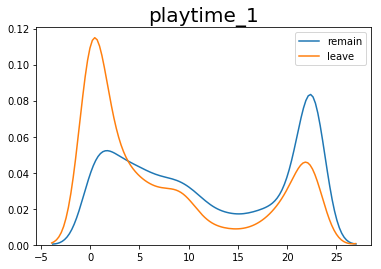

leave
0    11.990767
1     7.654527
Name: playtime_1, dtype: float64 




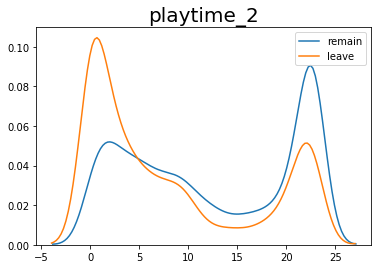

leave
0    12.420801
1     8.071375
Name: playtime_2, dtype: float64 




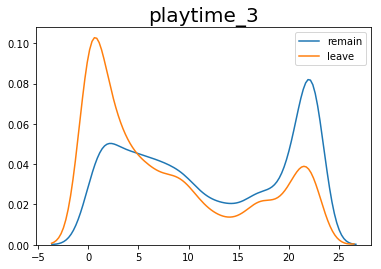

leave
0    12.220671
1     7.851653
Name: playtime_3, dtype: float64 




leave
0    12.976277
1     8.625178
Name: playtime_4, dtype: float64 




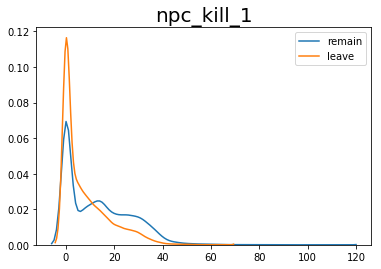

leave
0    13.175836
1     7.719630
Name: npc_kill_1, dtype: float64 




leave
0    3.092443
1    2.897961
Name: npc_kill_2, dtype: float64 




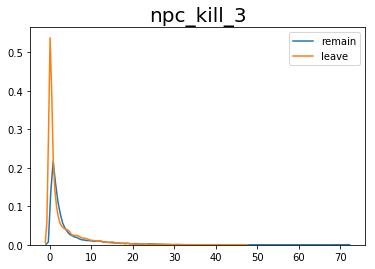

leave
0    2.712271
1    2.615437
Name: npc_kill_3, dtype: float64 




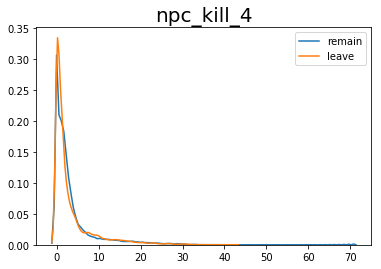

leave
0    3.488616
1    3.294428
Name: npc_kill_4, dtype: float64 




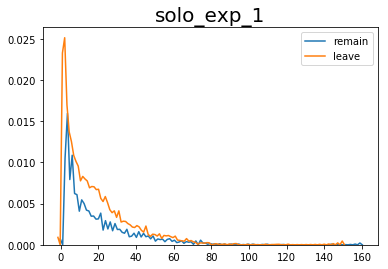

leave
0    3.554954
1    5.957461
Name: solo_exp_1, dtype: float64 




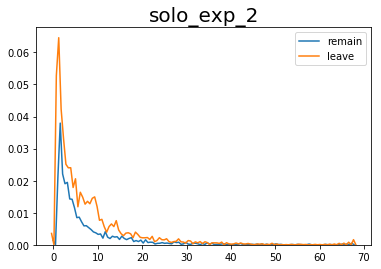

leave
0    1.133002
1    2.302872
Name: solo_exp_2, dtype: float64 




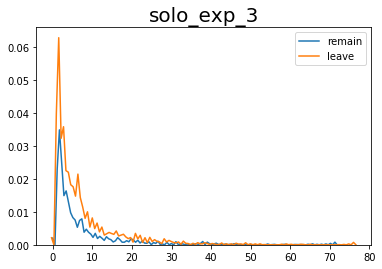

leave
0    1.051044
1    2.024511
Name: solo_exp_3, dtype: float64 




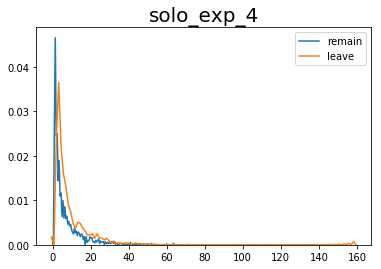

leave
0    1.082278
1    2.192546
Name: solo_exp_4, dtype: float64 




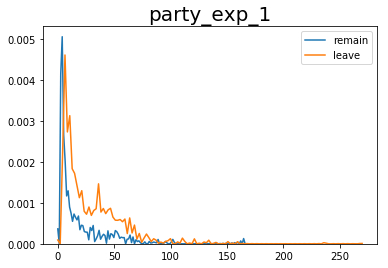

leave
0    0.772504
1    2.463483
Name: party_exp_1, dtype: float64 




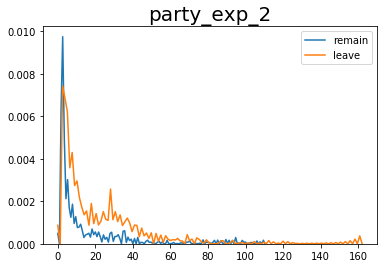

leave
0    0.689239
1    2.043741
Name: party_exp_2, dtype: float64 




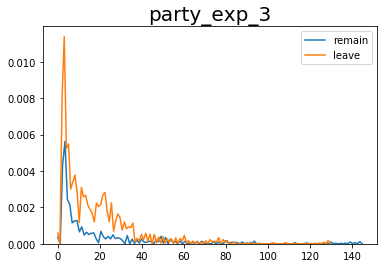

leave
0    0.667418
1    1.689203
Name: party_exp_3, dtype: float64 




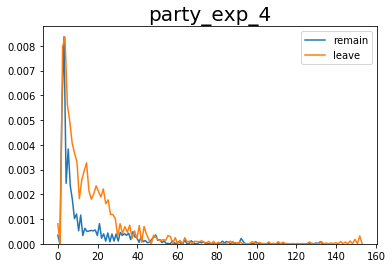

leave
0    0.693348
1    1.691327
Name: party_exp_4, dtype: float64 




leave
0    0.821093
1    1.709119
Name: quest_exp_1, dtype: float64 




leave
0    0.823131
1    1.416181
Name: quest_exp_2, dtype: float64 




leave
0    0.744758
1    1.229013
Name: quest_exp_3, dtype: float64 




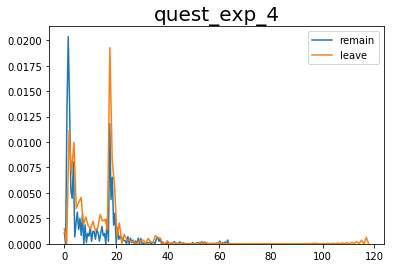

leave
0    0.681600
1    1.289916
Name: quest_exp_4, dtype: float64 




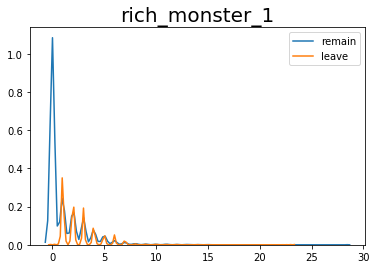

leave
0    1.159847
1    0.755980
Name: rich_monster_1, dtype: float64 




leave
0    2.487907
1    1.480116
Name: rich_monster_2, dtype: float64 




leave
0    1.150270
1    0.771236
Name: rich_monster_3, dtype: float64 




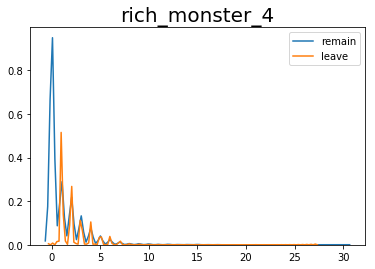

leave
0    1.156574
1    0.763016
Name: rich_monster_4, dtype: float64 




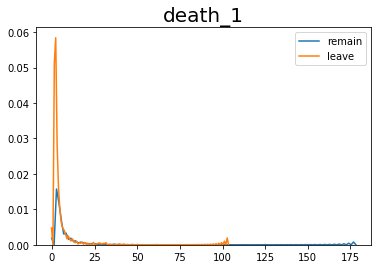

leave
0    0.771067
1    0.882125
Name: death_1, dtype: float64 




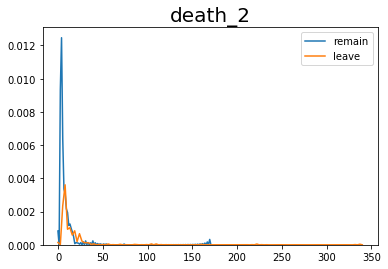

leave
0    0.680506
1    0.870143
Name: death_2, dtype: float64 




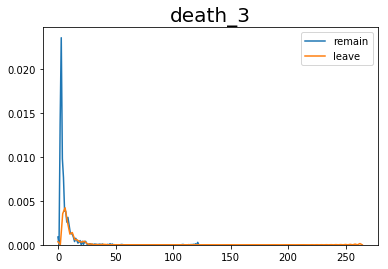

leave
0    0.632021
1    0.676758
Name: death_3, dtype: float64 




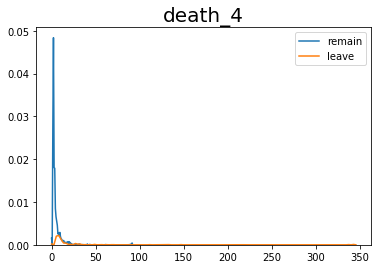

leave
0    0.662724
1    0.801238
Name: death_4, dtype: float64 




leave
0    0.717287
1    0.776740
Name: revive_1, dtype: float64 




leave
0    0.623028
1    0.764687
Name: revive_2, dtype: float64 




leave
0    0.576205
1    0.583640
Name: revive_3, dtype: float64 




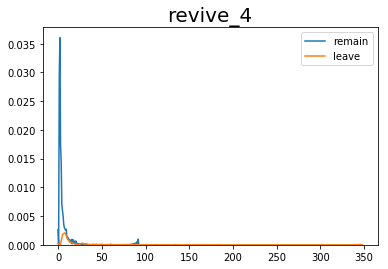

leave
0    0.605381
1    0.695888
Name: revive_4, dtype: float64 




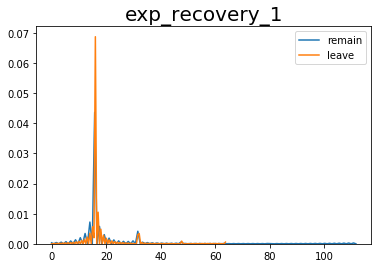

leave
0    0.601328
1    0.616547
Name: exp_recovery_1, dtype: float64 




leave
0    0.659334
1    0.649619
Name: exp_recovery_2, dtype: float64 




leave
0    0.508519
1    0.455914
Name: exp_recovery_3, dtype: float64 




leave
0    0.593594
1    0.479537
Name: exp_recovery_4, dtype: float64 




leave
0    1.868156
1    0.788243
Name: fishing_1, dtype: float64 




leave
0    2.337949
1    1.095915
Name: fishing_2, dtype: float64 




leave
0    2.444148
1    1.311010
Name: fishing_3, dtype: float64 




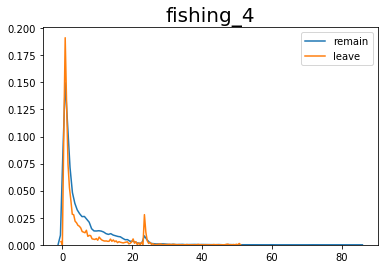

leave
0    3.227286
1    1.923480
Name: fishing_4, dtype: float64 




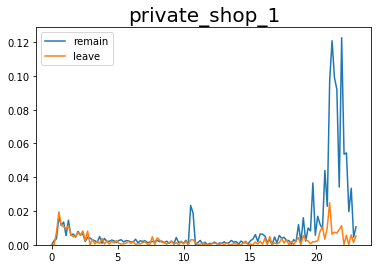

leave
0    4.079593
1    0.728180
Name: private_shop_1, dtype: float64 




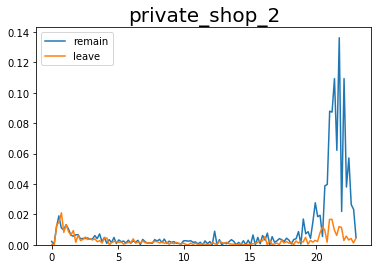

leave
0    4.208537
1    0.781207
Name: private_shop_2, dtype: float64 




leave
0    4.122548
1    0.770874
Name: private_shop_3, dtype: float64 




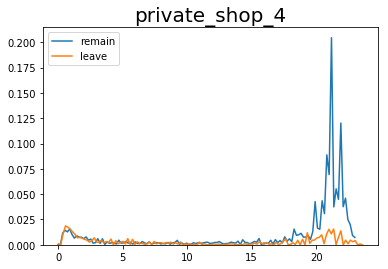

leave
0    4.248468
1    0.799057
Name: private_shop_4, dtype: float64 




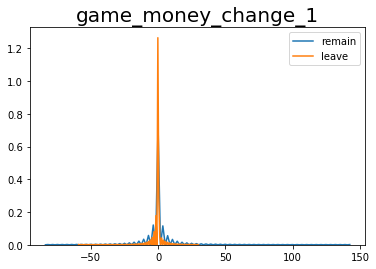

leave
0    0.000067
1   -0.010268
Name: game_money_change_1, dtype: float64 




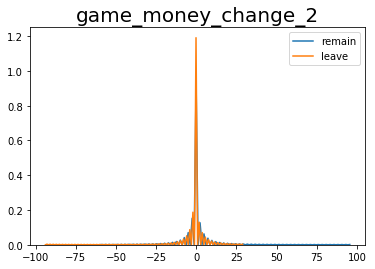

leave
0    0.029586
1   -0.005309
Name: game_money_change_2, dtype: float64 




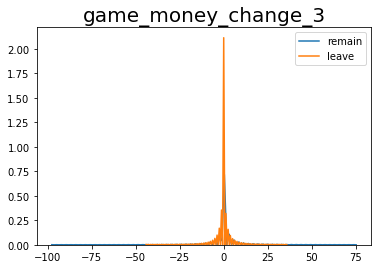

leave
0   -0.087948
1   -0.003188
Name: game_money_change_3, dtype: float64 




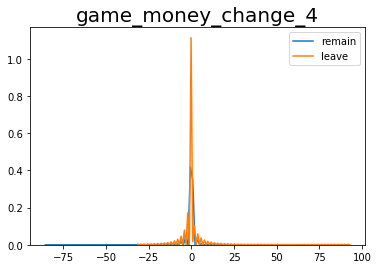

leave
0    0.003425
1   -0.010090
Name: game_money_change_4, dtype: float64 




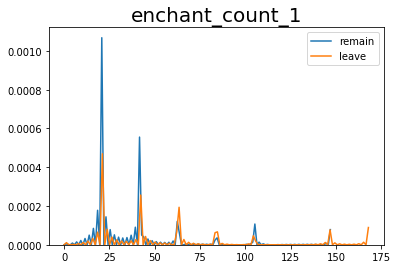

leave
0    0.082675
1    0.083913
Name: enchant_count_1, dtype: float64 




leave
0    0.118289
1    0.128977
Name: enchant_count_2, dtype: float64 




leave
0    0.237849
1    0.192689
Name: enchant_count_3, dtype: float64 




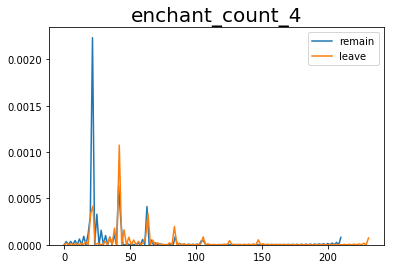

leave
0    0.195876
1    0.200458
Name: enchant_count_4, dtype: float64 




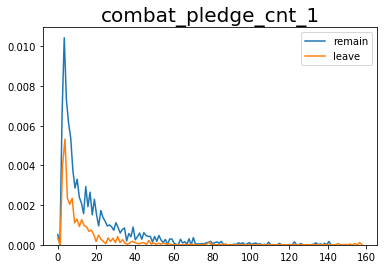

leave
0    1.806967
1    0.519382
Name: combat_pledge_cnt_1, dtype: float64 




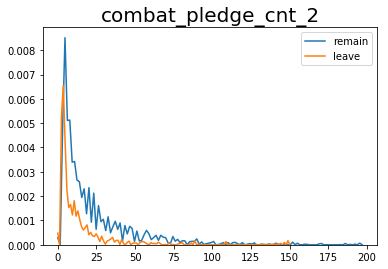

leave
0    2.500427
1    0.637560
Name: combat_pledge_cnt_2, dtype: float64 




leave
0    2.160799
1    0.462704
Name: combat_pledge_cnt_3, dtype: float64 




leave
0    2.302649
1    0.553806
Name: combat_pledge_cnt_4, dtype: float64 




leave
0    0.489195
1    0.252316
Name: combat_random_attacker_cnt_1, dtype: float64 




leave
0    0.466171
1    0.247909
Name: combat_random_attacker_cnt_2, dtype: float64 




leave
0    0.488694
1    0.291494
Name: combat_random_attacker_cnt_3, dtype: float64 




leave
0    0.513444
1    0.312242
Name: combat_random_attacker_cnt_4, dtype: float64 




leave
0    0.986281
1    1.140746
Name: combat_random_defender_cnt_1, dtype: float64 




leave
0    0.906177
1    1.171762
Name: combat_random_defender_cnt_2, dtype: float64 




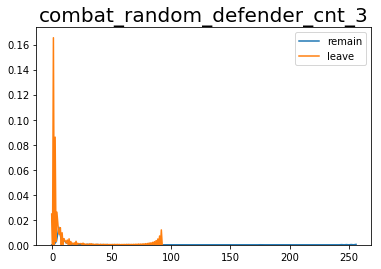

leave
0    1.210387
1    1.154502
Name: combat_random_defender_cnt_3, dtype: float64 




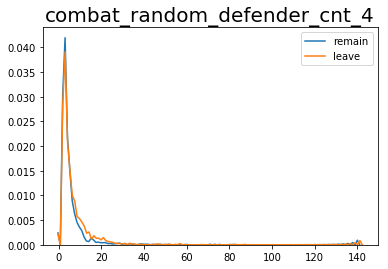

leave
0    1.057350
1    1.326227
Name: combat_random_defender_cnt_4, dtype: float64 




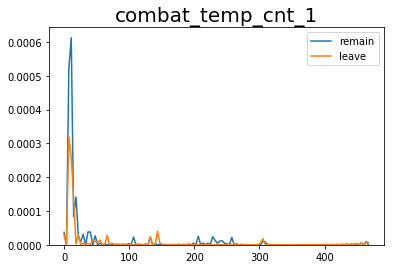

leave
0    0.756596
1    0.480119
Name: combat_temp_cnt_1, dtype: float64 




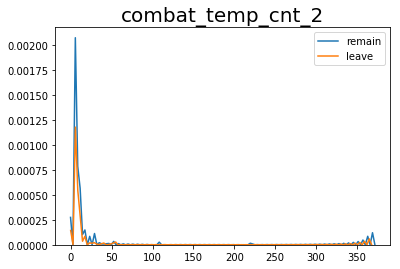

leave
0    0.726498
1    0.468821
Name: combat_temp_cnt_2, dtype: float64 




leave
0    0.761626
1    0.501613
Name: combat_temp_cnt_3, dtype: float64 




leave
0    1.013718
1    0.550818
Name: combat_temp_cnt_4, dtype: float64 




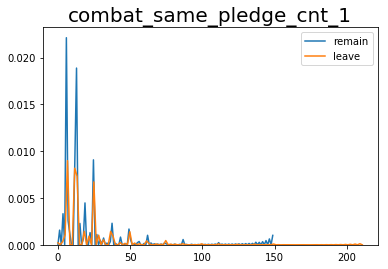

leave
0    1.282515
1    1.052242
Name: combat_same_pledge_cnt_1, dtype: float64 




leave
0    0.611384
1    0.311265
Name: combat_same_pledge_cnt_2, dtype: float64 




leave
0    0.511804
1    0.213478
Name: combat_same_pledge_cnt_3, dtype: float64 




leave
0    0.579067
1    0.240106
Name: combat_same_pledge_cnt_4, dtype: float64 




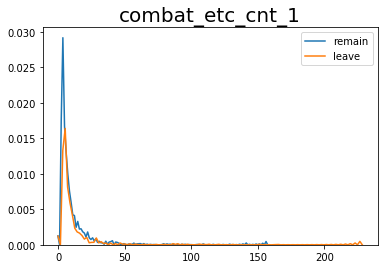

leave
0    1.961592
1    1.517583
Name: combat_etc_cnt_1, dtype: float64 




leave
0    2.495775
1    2.214568
Name: combat_etc_cnt_2, dtype: float64 




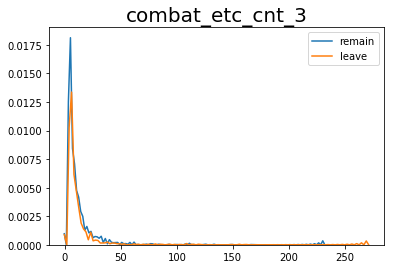

leave
0    1.906259
1    1.569306
Name: combat_etc_cnt_3, dtype: float64 




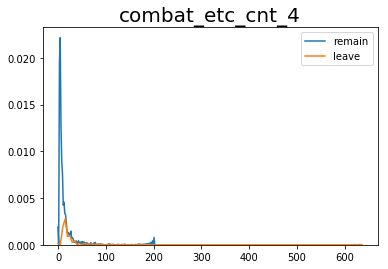

leave
0    2.206167
1    1.780960
Name: combat_etc_cnt_4, dtype: float64 




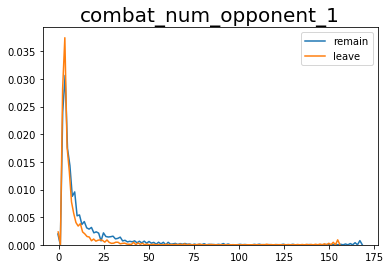

leave
0    2.930164
1    1.523964
Name: combat_num_opponent_1, dtype: float64 




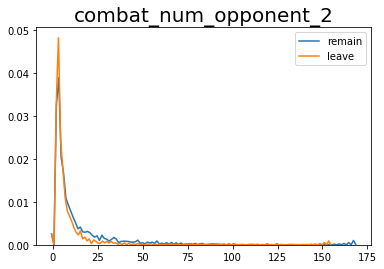

leave
0    3.836545
1    1.937329
Name: combat_num_opponent_2, dtype: float64 




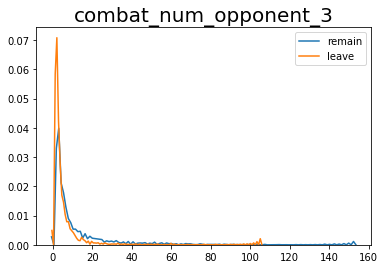

leave
0    3.251502
1    1.519335
Name: combat_num_opponent_3, dtype: float64 




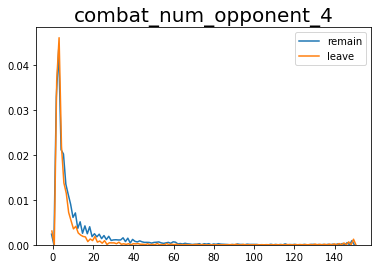

leave
0    3.466913
1    1.669657
Name: combat_num_opponent_4, dtype: float64 




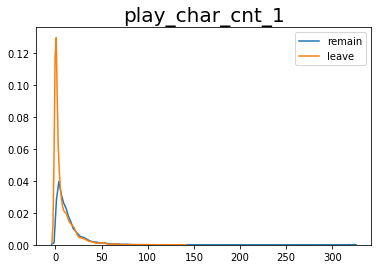

leave
0    8.826014
1    7.722663
Name: play_char_cnt_1, dtype: float64 




leave
0    9.160700
1    8.381601
Name: play_char_cnt_2, dtype: float64 




leave
0    8.901621
1    8.281452
Name: play_char_cnt_3, dtype: float64 




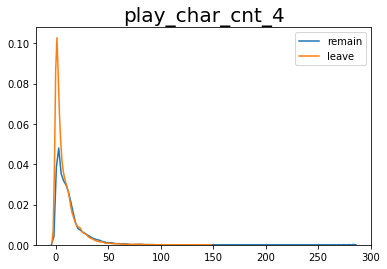

leave
0    9.042629
1    8.618866
Name: play_char_cnt_4, dtype: float64 




leave
0    3.305954
1    2.981791
Name: combat_char_cnt_1, dtype: float64 




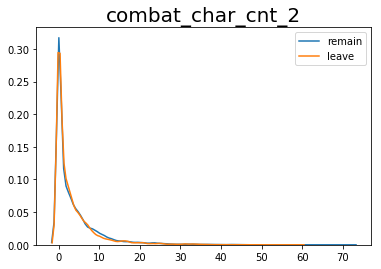

leave
0    3.726565
1    3.382769
Name: combat_char_cnt_2, dtype: float64 




leave
0    3.461912
1    3.038612
Name: combat_char_cnt_3, dtype: float64 




leave
0    3.577408
1    3.277553
Name: combat_char_cnt_4, dtype: float64 




leave
0    1.888220
1    0.858253
Name: pledge_combat_cnt_1, dtype: float64 




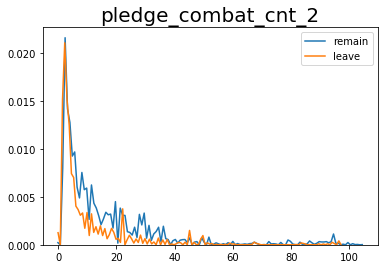

leave
0    2.603003
1    1.088689
Name: pledge_combat_cnt_2, dtype: float64 




leave
0    2.250693
1    0.799261
Name: pledge_combat_cnt_3, dtype: float64 




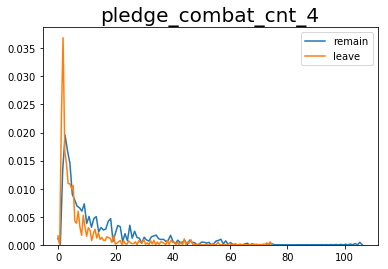

leave
0    2.333076
1    0.991690
Name: pledge_combat_cnt_4, dtype: float64 




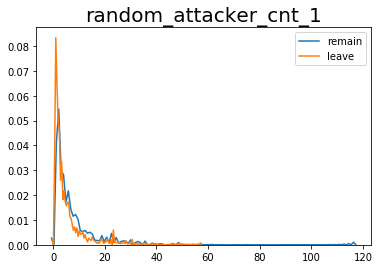

leave
0    2.308745
1    1.505343
Name: random_attacker_cnt_1, dtype: float64 




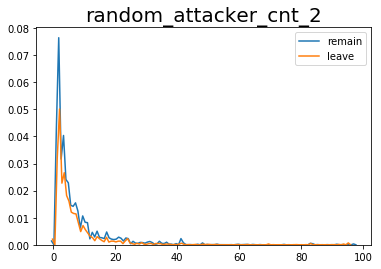

leave
0    2.315239
1    1.486410
Name: random_attacker_cnt_2, dtype: float64 




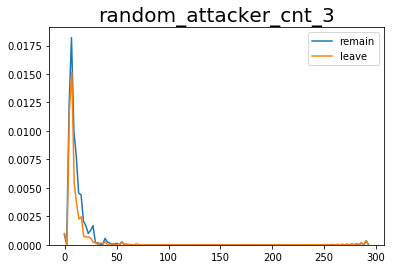

leave
0    2.120459
1    1.371491
Name: random_attacker_cnt_3, dtype: float64 




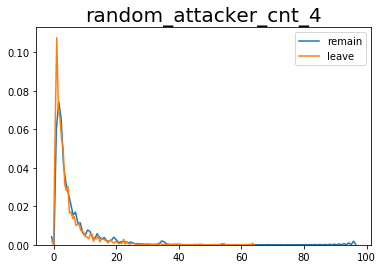

leave
0    2.117878
1    1.599724
Name: random_attacker_cnt_4, dtype: float64 




leave
0    1.432678
1    1.854888
Name: random_defender_cnt_1, dtype: float64 




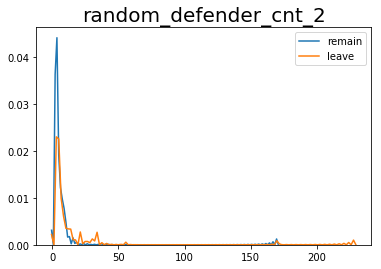

leave
0    1.320860
1    2.247958
Name: random_defender_cnt_2, dtype: float64 




leave
0    1.769977
1    1.962792
Name: random_defender_cnt_3, dtype: float64 




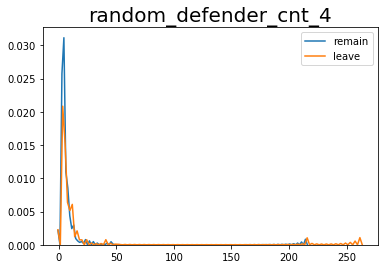

leave
0    1.546806
1    2.168581
Name: random_defender_cnt_4, dtype: float64 




leave
0    4.720836
1    3.638006
Name: same_pledge_cnt_1, dtype: float64 




leave
0    1.730783
1    0.905590
Name: same_pledge_cnt_2, dtype: float64 




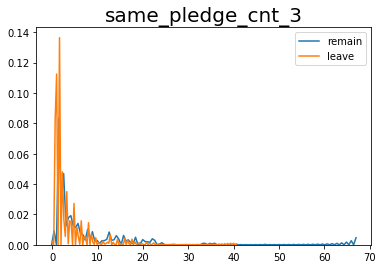

leave
0    1.285823
1    0.608382
Name: same_pledge_cnt_3, dtype: float64 




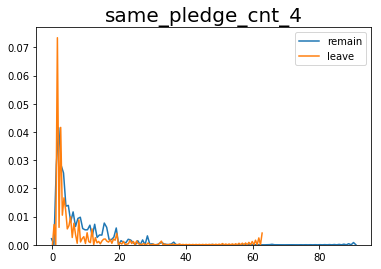

leave
0    1.564906
1    0.812129
Name: same_pledge_cnt_4, dtype: float64 




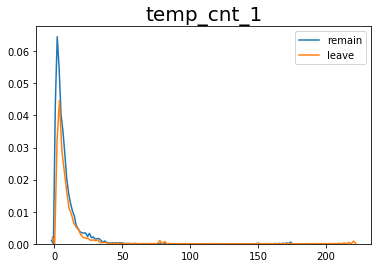

leave
0    4.203066
1    3.356971
Name: temp_cnt_1, dtype: float64 




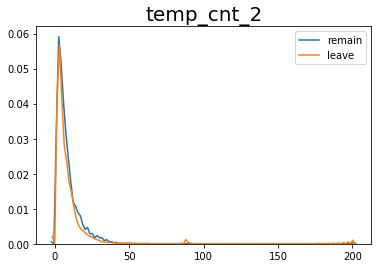

leave
0    4.562502
1    3.728769
Name: temp_cnt_2, dtype: float64 




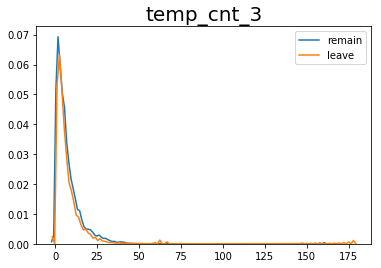

leave
0    4.578320
1    3.641054
Name: temp_cnt_3, dtype: float64 




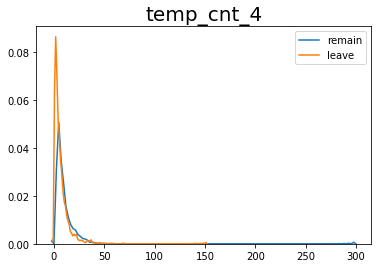

leave
0    5.194222
1    4.077514
Name: temp_cnt_4, dtype: float64 




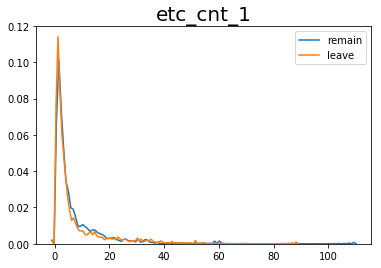

leave
0    3.542549
1    3.324386
Name: etc_cnt_1, dtype: float64 




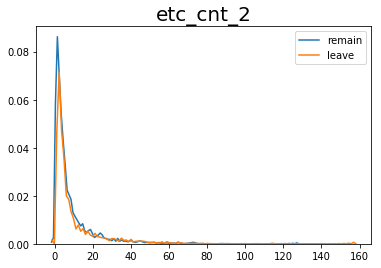

leave
0    4.687325
1    4.458274
Name: etc_cnt_2, dtype: float64 




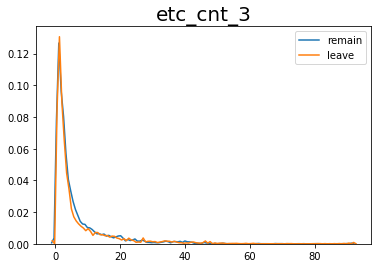

leave
0    3.520301
1    3.399271
Name: etc_cnt_3, dtype: float64 




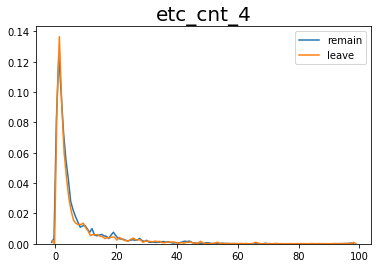

leave
0    3.907898
1    3.835414
Name: etc_cnt_4, dtype: float64 




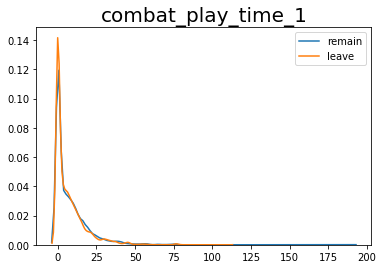

leave
0    7.832428
1    7.134629
Name: combat_play_time_1, dtype: float64 




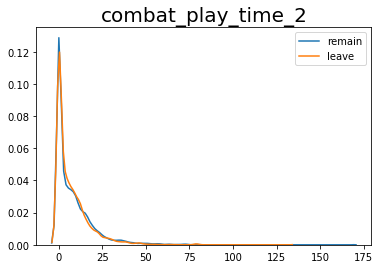

leave
0    8.049566
1    7.379344
Name: combat_play_time_2, dtype: float64 




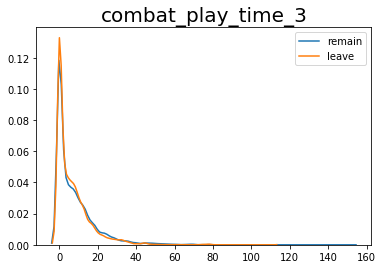

leave
0    7.793680
1    6.928806
Name: combat_play_time_3, dtype: float64 




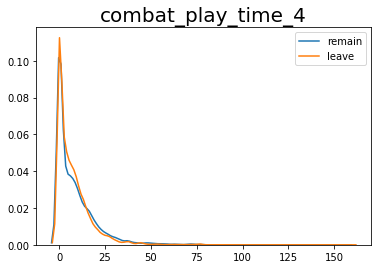

leave
0    8.328709
1    7.530083
Name: combat_play_time_4, dtype: float64 




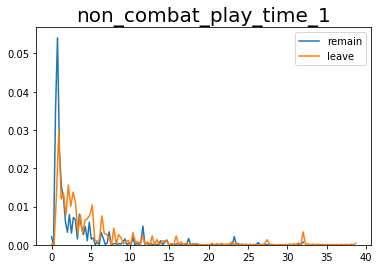

leave
0    0.189303
1    0.314937
Name: non_combat_play_time_1, dtype: float64 




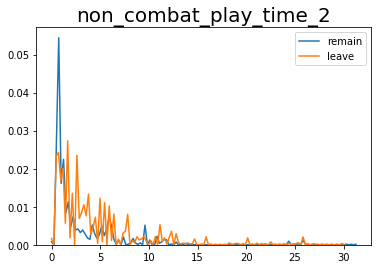

leave
0    0.180468
1    0.324852
Name: non_combat_play_time_2, dtype: float64 




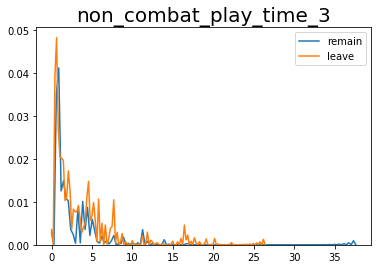

leave
0    0.162953
1    0.304882
Name: non_combat_play_time_3, dtype: float64 




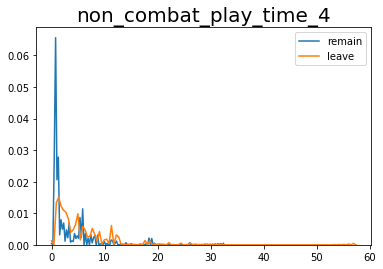

leave
0    0.186274
1    0.378034
Name: non_combat_play_time_4, dtype: float64 




In [95]:
for i in range(1, 121):
    column = data.columns[i]
    sns.kdeplot(data.loc[data['leave'] == 0, column], label = 'remain')
    sns.kdeplot(data.loc[data['leave'] == 1, column], label = 'leave')
    plt.title(column, fontsize = 20)
    plt.show()
    print(data.groupby('leave')[column].mean(), '\n\n')

amount
0    10.135191
1     9.972658
Name: playtime_1, dtype: float64 




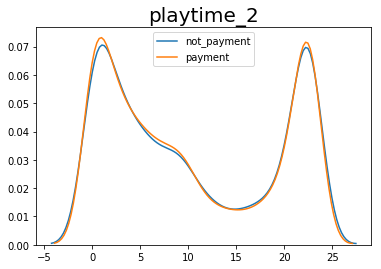

amount
0    10.547121
1    10.405155
Name: playtime_2, dtype: float64 




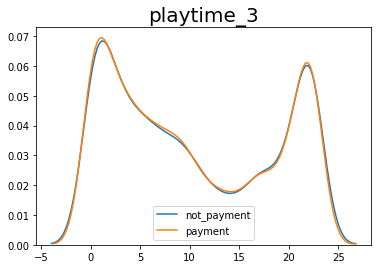

amount
0    10.313325
1    10.213355
Name: playtime_3, dtype: float64 




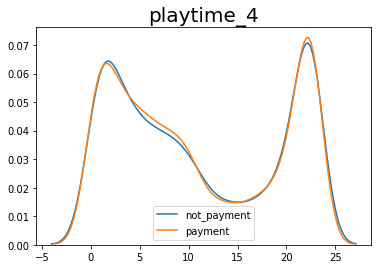

amount
0    11.066861
1    10.984021
Name: playtime_4, dtype: float64 




amount
0    10.673445
1    10.752125
Name: npc_kill_1, dtype: float64 




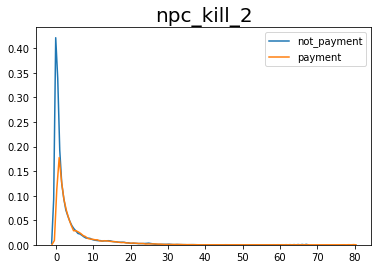

amount
0    3.013623
1    2.998891
Name: npc_kill_2, dtype: float64 




amount
0    2.684393
1    2.657846
Name: npc_kill_3, dtype: float64 




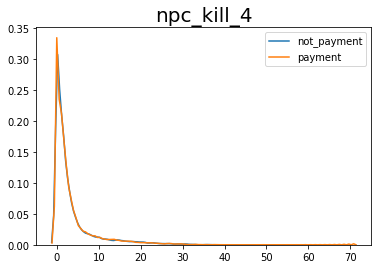

amount
0    3.406723
1    3.397409
Name: npc_kill_4, dtype: float64 




amount
0    4.532606
1    4.707901
Name: solo_exp_1, dtype: float64 




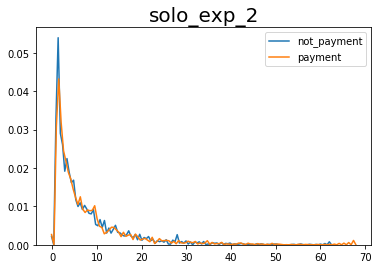

amount
0    1.631340
1    1.679036
Name: solo_exp_2, dtype: float64 




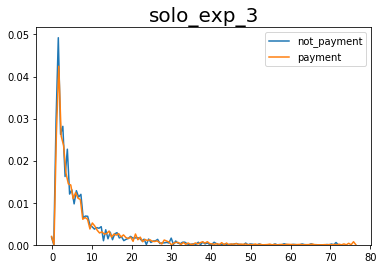

amount
0    1.474928
1    1.499052
Name: solo_exp_3, dtype: float64 




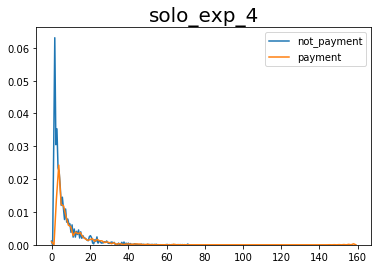

amount
0    1.569078
1    1.590934
Name: solo_exp_4, dtype: float64 




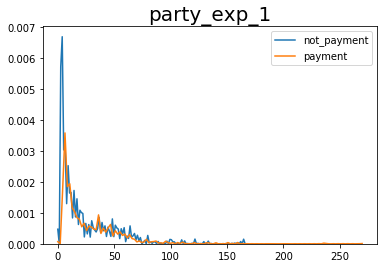

amount
0    1.598536
1    1.488808
Name: party_exp_1, dtype: float64 




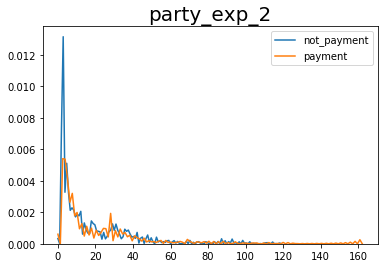

amount
0    1.340119
1    1.270454
Name: party_exp_2, dtype: float64 




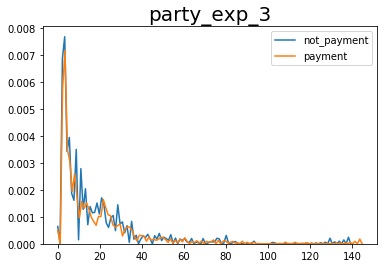

amount
0    1.183117
1    1.088818
Name: party_exp_3, dtype: float64 




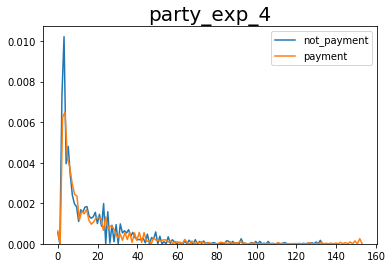

amount
0    1.173508
1    1.121165
Name: party_exp_4, dtype: float64 




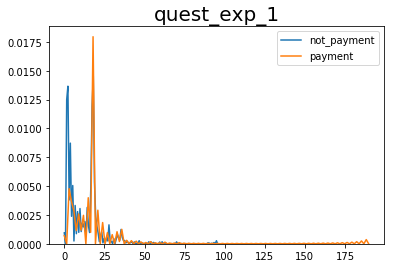

amount
0    1.232595
1    1.212649
Name: quest_exp_1, dtype: float64 




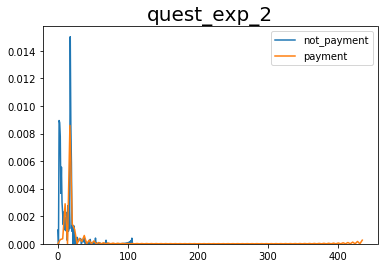

amount
0    1.066670
1    1.106207
Name: quest_exp_2, dtype: float64 




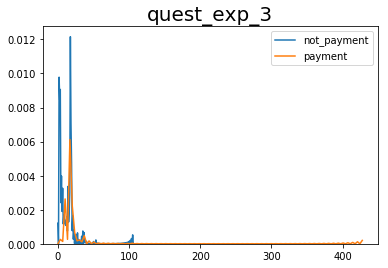

amount
0    0.939157
1    0.978984
Name: quest_exp_3, dtype: float64 




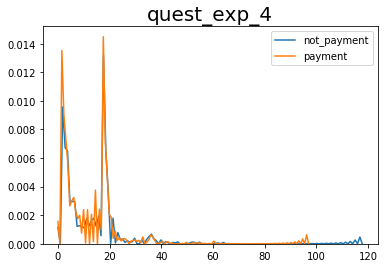

amount
0    0.958472
1    0.953285
Name: quest_exp_4, dtype: float64 




amount
0    0.956408
1    0.993014
Name: rich_monster_1, dtype: float64 




amount
0    2.011020
1    2.050366
Name: rich_monster_2, dtype: float64 




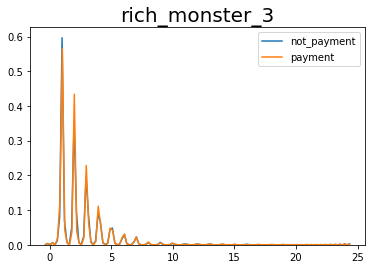

amount
0    0.971429
1    0.985352
Name: rich_monster_3, dtype: float64 




amount
0    0.963673
1    0.990310
Name: rich_monster_4, dtype: float64 




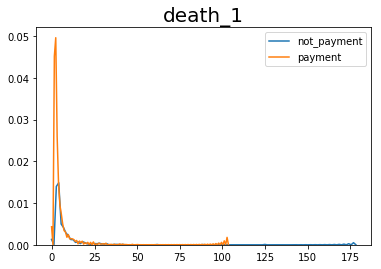

amount
0    0.825446
1    0.818023
Name: death_1, dtype: float64 




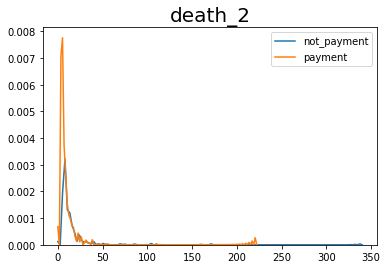

amount
0    0.792166
1    0.747707
Name: death_2, dtype: float64 




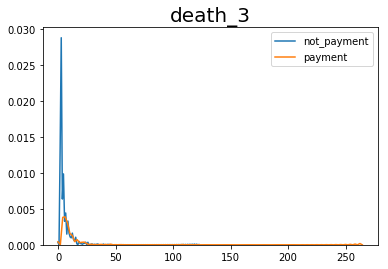

amount
0    0.621894
1    0.673042
Name: death_3, dtype: float64 




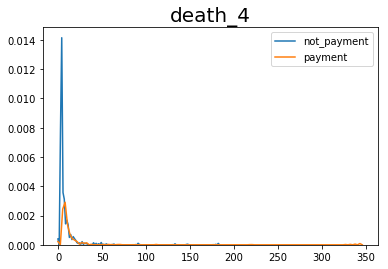

amount
0    0.734620
1    0.718478
Name: death_4, dtype: float64 




amount
0    0.749441
1    0.740325
Name: revive_1, dtype: float64 




amount
0    0.712573
1    0.668994
Name: revive_2, dtype: float64 




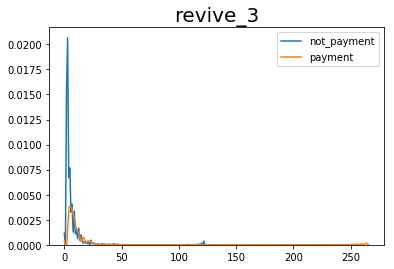

amount
0    0.548240
1    0.601161
Name: revive_3, dtype: float64 




amount
0    0.653898
1    0.640749
Name: revive_4, dtype: float64 




amount
0    0.597589
1    0.615486
Name: exp_recovery_1, dtype: float64 




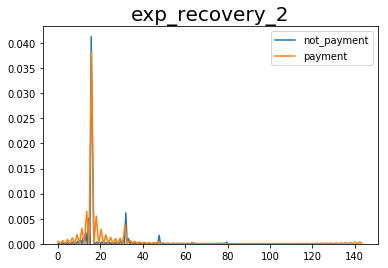

amount
0    0.678309
1    0.638848
Name: exp_recovery_2, dtype: float64 




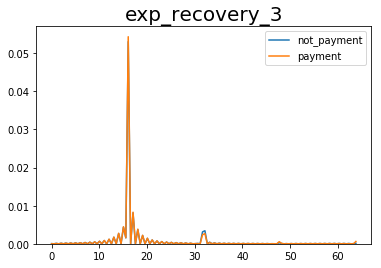

amount
0    0.483019
1    0.486099
Name: exp_recovery_3, dtype: float64 




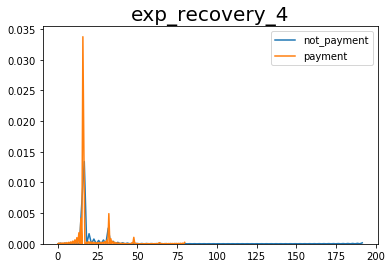

amount
0    0.536398
1    0.546300
Name: exp_recovery_4, dtype: float64 




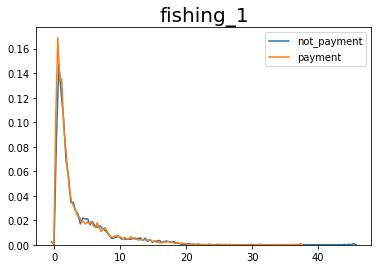

amount
0    1.388816
1    1.377444
Name: fishing_1, dtype: float64 




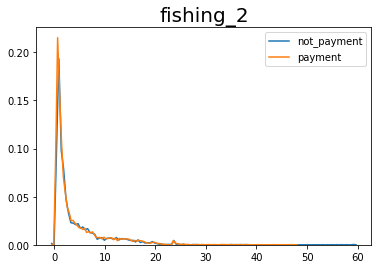

amount
0    1.747337
1    1.800699
Name: fishing_2, dtype: float64 




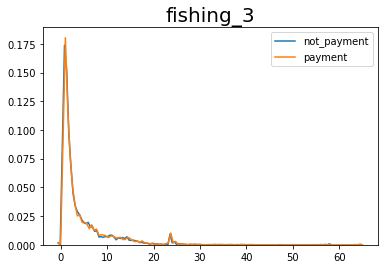

amount
0    1.876238
1    1.974072
Name: fishing_3, dtype: float64 




amount
0    2.611054
1    2.660726
Name: fishing_4, dtype: float64 




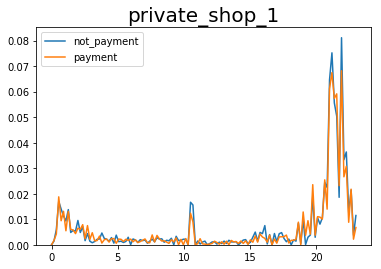

amount
0    2.652219
1    2.515154
Name: private_shop_1, dtype: float64 




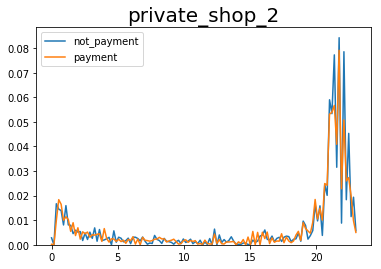

amount
0    2.749596
1    2.608131
Name: private_shop_2, dtype: float64 




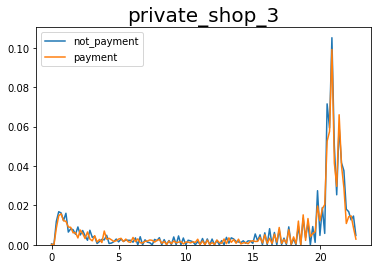

amount
0    2.673491
1    2.572874
Name: private_shop_3, dtype: float64 




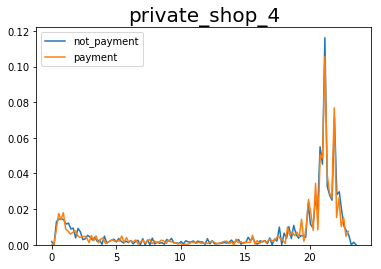

amount
0    2.758614
1    2.652599
Name: private_shop_4, dtype: float64 




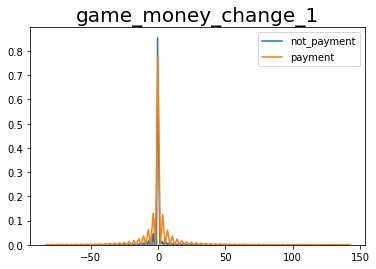

amount
0    0.006777
1   -0.012426
Name: game_money_change_1, dtype: float64 




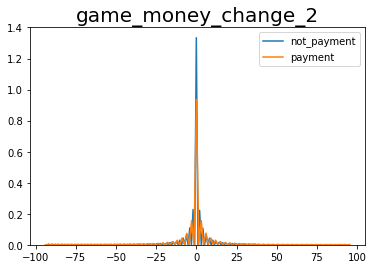

amount
0    0.007571
1    0.018233
Name: game_money_change_2, dtype: float64 




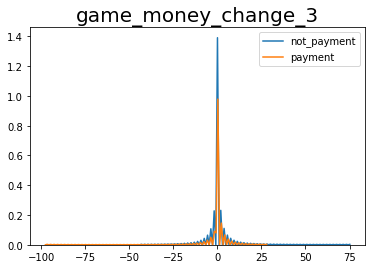

amount
0   -0.050321
1   -0.049437
Name: game_money_change_3, dtype: float64 




amount
0    0.001776
1   -0.005719
Name: game_money_change_4, dtype: float64 




amount
0    0.056525
1    0.101663
Name: enchant_count_1, dtype: float64 




amount
0    0.118189
1    0.126488
Name: enchant_count_2, dtype: float64 




amount
0    0.229527
1    0.209238
Name: enchant_count_3, dtype: float64 




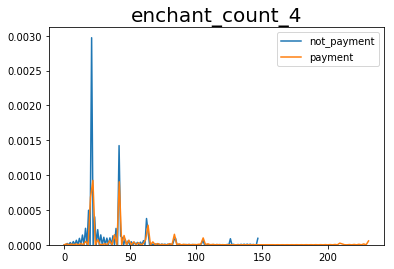

amount
0    0.198695
1    0.197416
Name: enchant_count_4, dtype: float64 




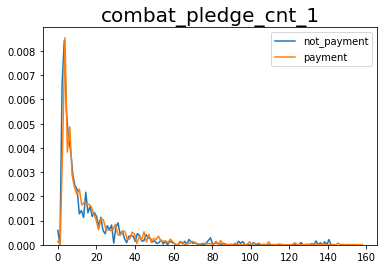

amount
0    1.161462
1    1.272949
Name: combat_pledge_cnt_1, dtype: float64 




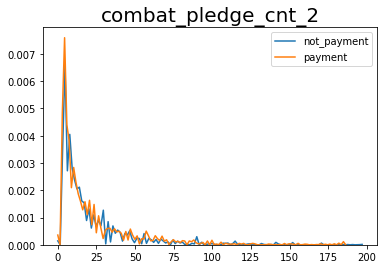

amount
0    1.537493
1    1.747844
Name: combat_pledge_cnt_2, dtype: float64 




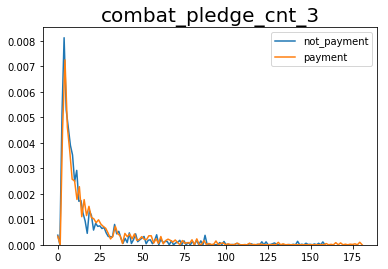

amount
0    1.286671
1    1.472274
Name: combat_pledge_cnt_3, dtype: float64 




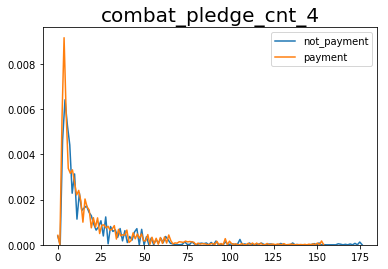

amount
0    1.433645
1    1.571982
Name: combat_pledge_cnt_4, dtype: float64 




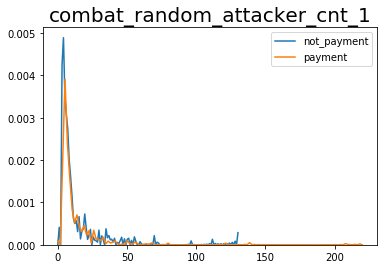

amount
0    0.415303
1    0.359989
Name: combat_random_attacker_cnt_1, dtype: float64 




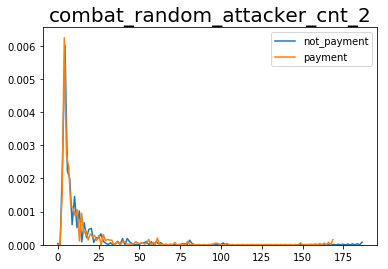

amount
0    0.366075
1    0.369212
Name: combat_random_attacker_cnt_2, dtype: float64 




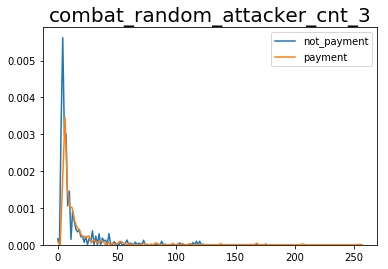

amount
0    0.401265
1    0.399016
Name: combat_random_attacker_cnt_3, dtype: float64 




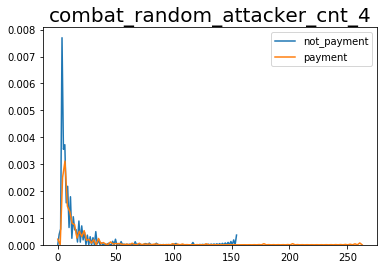

amount
0    0.388016
1    0.446946
Name: combat_random_attacker_cnt_4, dtype: float64 




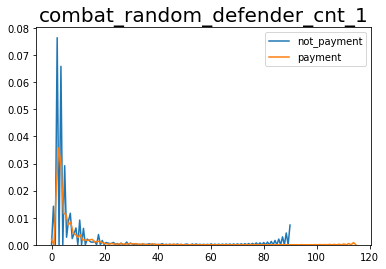

amount
0    1.059157
1    1.053494
Name: combat_random_defender_cnt_1, dtype: float64 




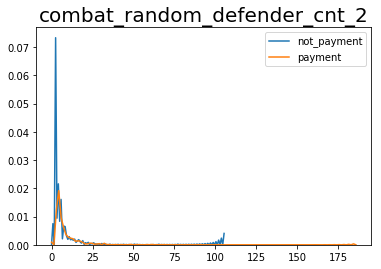

amount
0    1.006522
1    1.038964
Name: combat_random_defender_cnt_2, dtype: float64 




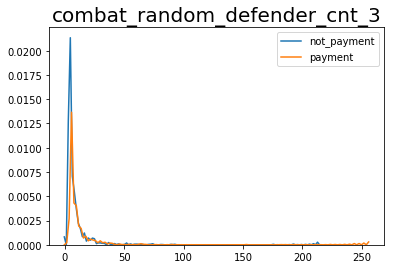

amount
0    1.150615
1    1.209125
Name: combat_random_defender_cnt_3, dtype: float64 




amount
0    1.179008
1    1.177932
Name: combat_random_defender_cnt_4, dtype: float64 




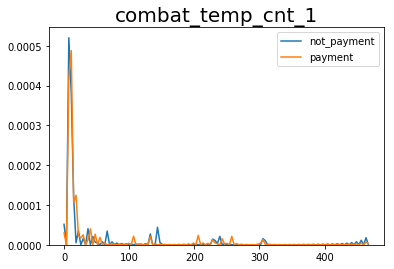

amount
0    0.639702
1    0.626943
Name: combat_temp_cnt_1, dtype: float64 




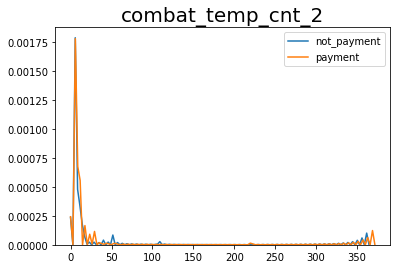

amount
0    0.582527
1    0.629835
Name: combat_temp_cnt_2, dtype: float64 




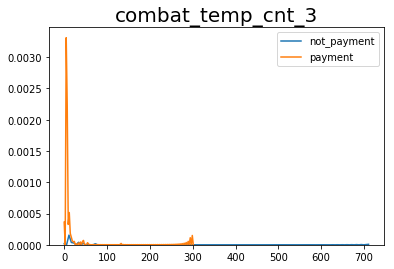

amount
0    0.639037
1    0.648430
Name: combat_temp_cnt_3, dtype: float64 




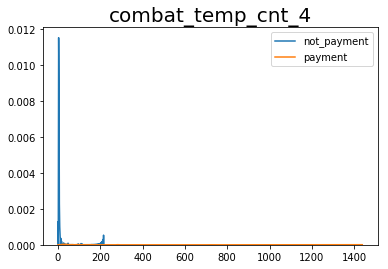

amount
0    0.713091
1    0.869050
Name: combat_temp_cnt_4, dtype: float64 




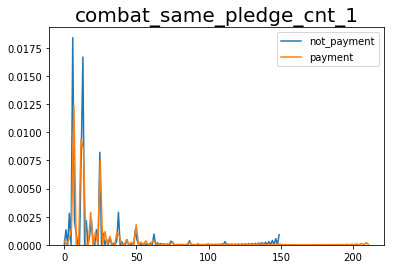

amount
0    1.100157
1    1.233192
Name: combat_same_pledge_cnt_1, dtype: float64 




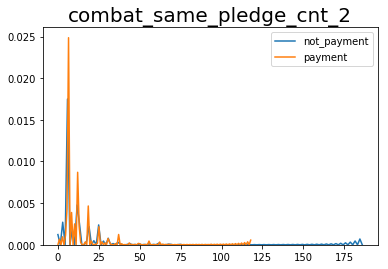

amount
0    0.473159
1    0.478469
Name: combat_same_pledge_cnt_2, dtype: float64 




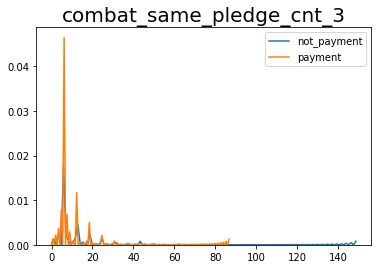

amount
0    0.386118
1    0.371599
Name: combat_same_pledge_cnt_3, dtype: float64 




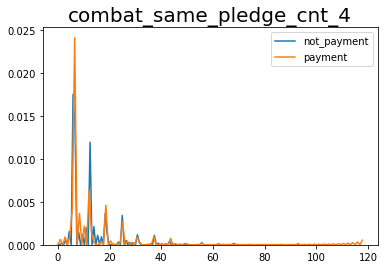

amount
0    0.393708
1    0.449132
Name: combat_same_pledge_cnt_4, dtype: float64 




amount
0    1.805894
1    1.731274
Name: combat_etc_cnt_1, dtype: float64 




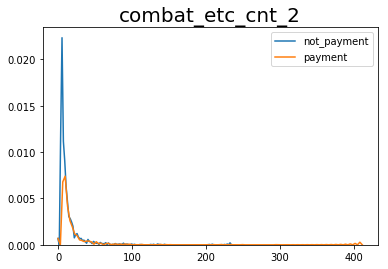

amount
0    2.41349
1    2.33864
Name: combat_etc_cnt_2, dtype: float64 




amount
0    1.780347
1    1.736825
Name: combat_etc_cnt_3, dtype: float64 




amount
0    2.040567
1    1.996986
Name: combat_etc_cnt_4, dtype: float64 




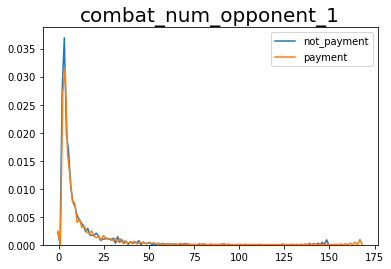

amount
0    2.257546
1    2.324623
Name: combat_num_opponent_1, dtype: float64 




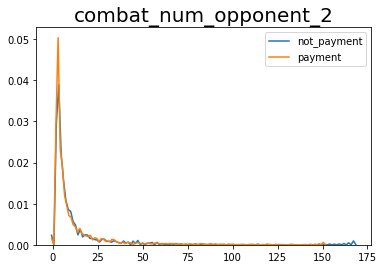

amount
0    2.883263
1    3.049648
Name: combat_num_opponent_2, dtype: float64 




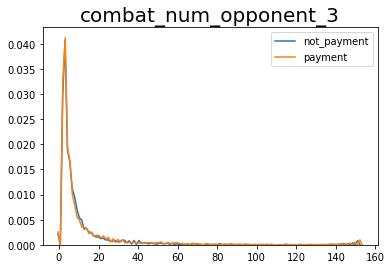

amount
0    2.372096
1    2.540700
Name: combat_num_opponent_3, dtype: float64 




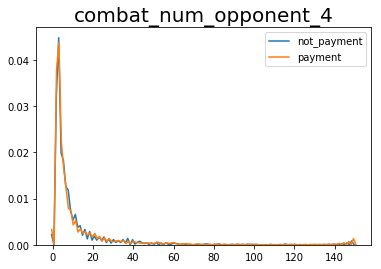

amount
0    2.577678
1    2.713379
Name: combat_num_opponent_4, dtype: float64 




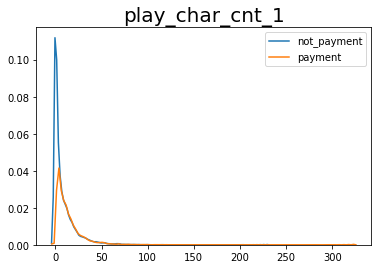

amount
0    8.292592
1    8.354795
Name: play_char_cnt_1, dtype: float64 




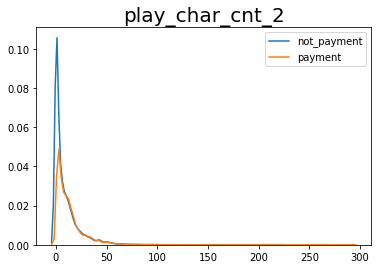

amount
0    8.800326
1    8.816722
Name: play_char_cnt_2, dtype: float64 




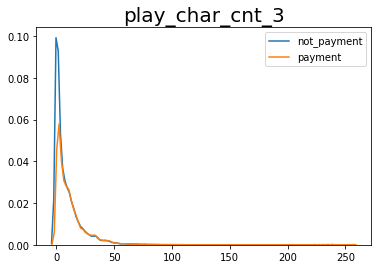

amount
0    8.641527
1    8.609340
Name: play_char_cnt_3, dtype: float64 




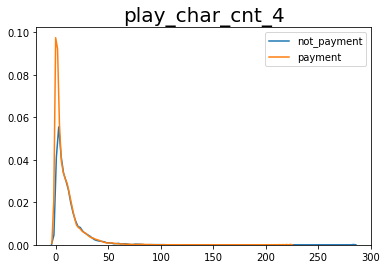

amount
0    8.888755
1    8.826453
Name: play_char_cnt_4, dtype: float64 




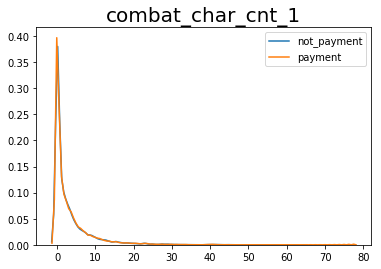

amount
0    3.142354
1    3.172259
Name: combat_char_cnt_1, dtype: float64 




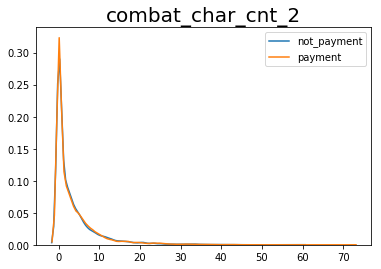

amount
0    3.561026
1    3.579274
Name: combat_char_cnt_2, dtype: float64 




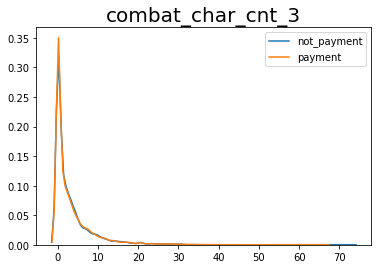

amount
0    3.262913
1    3.277231
Name: combat_char_cnt_3, dtype: float64 




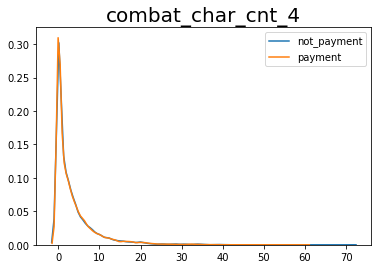

amount
0    3.435040
1    3.447553
Name: combat_char_cnt_4, dtype: float64 




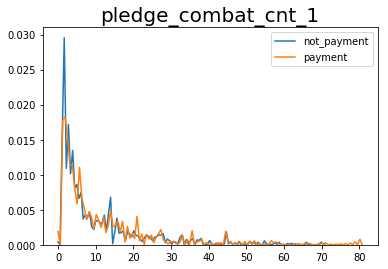

amount
0    1.402423
1    1.439959
Name: pledge_combat_cnt_1, dtype: float64 




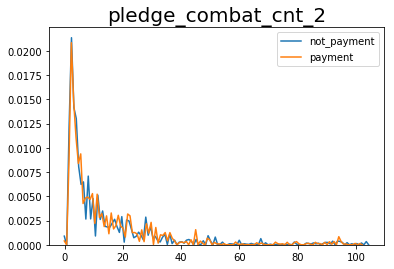

amount
0    1.831680
1    1.983337
Name: pledge_combat_cnt_2, dtype: float64 




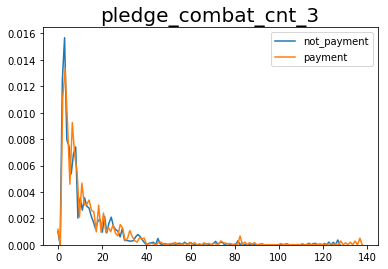

amount
0    1.525952
1    1.646715
Name: pledge_combat_cnt_3, dtype: float64 




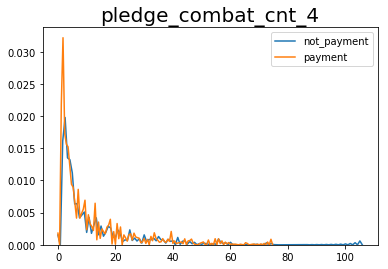

amount
0    1.666641
1    1.772574
Name: pledge_combat_cnt_4, dtype: float64 




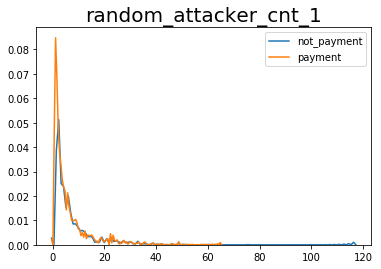

amount
0    1.910859
1    1.972169
Name: random_attacker_cnt_1, dtype: float64 




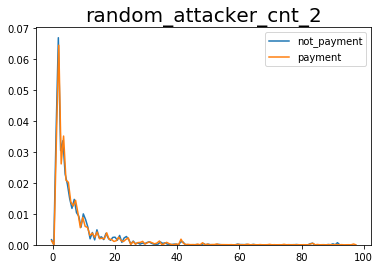

amount
0    1.917443
1    1.959257
Name: random_attacker_cnt_2, dtype: float64 




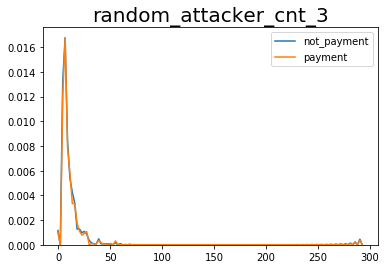

amount
0    1.811150
1    1.764162
Name: random_attacker_cnt_3, dtype: float64 




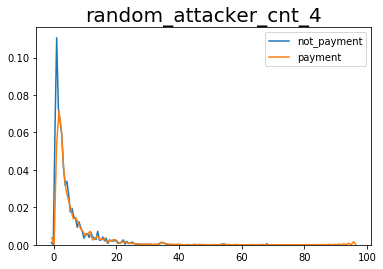

amount
0    1.860171
1    1.901556
Name: random_attacker_cnt_4, dtype: float64 




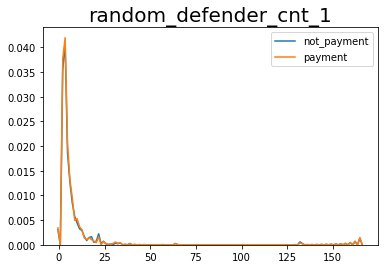

amount
0    1.653857
1    1.601222
Name: random_defender_cnt_1, dtype: float64 




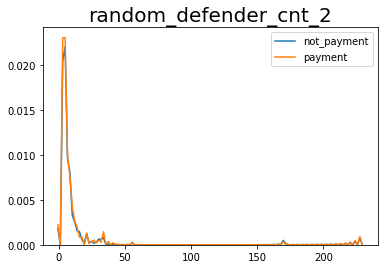

amount
0    1.749849
1    1.730071
Name: random_defender_cnt_2, dtype: float64 




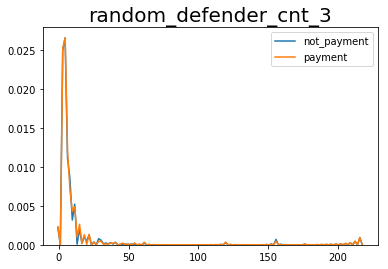

amount
0    1.868153
1    1.848902
Name: random_defender_cnt_3, dtype: float64 




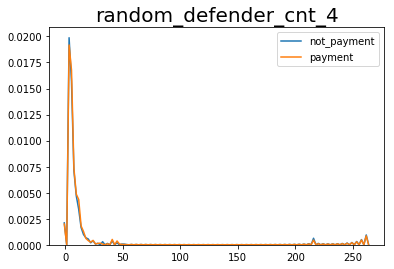

amount
0    1.859902
1    1.803730
Name: random_defender_cnt_4, dtype: float64 




amount
0    4.163192
1    4.281945
Name: same_pledge_cnt_1, dtype: float64 




amount
0    1.334954
1    1.376210
Name: same_pledge_cnt_2, dtype: float64 




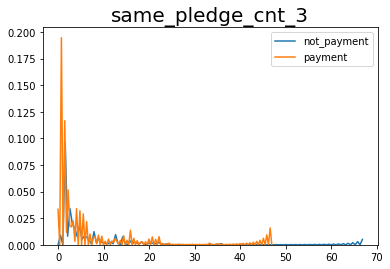

amount
0    0.965611
1    0.991464
Name: same_pledge_cnt_3, dtype: float64 




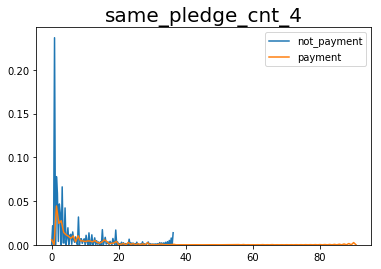

amount
0    1.170127
1    1.264697
Name: same_pledge_cnt_4, dtype: float64 




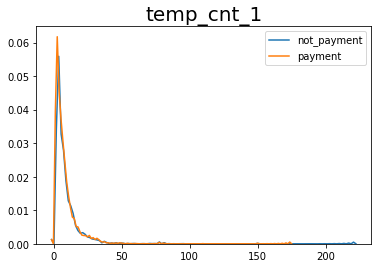

amount
0    3.791475
1    3.843470
Name: temp_cnt_1, dtype: float64 




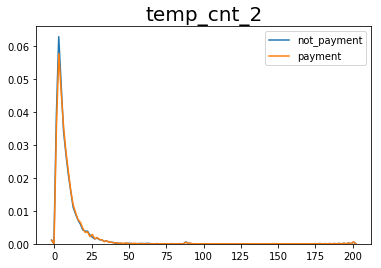

amount
0    4.154880
1    4.209571
Name: temp_cnt_2, dtype: float64 




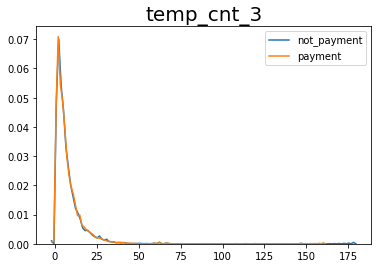

amount
0    4.190454
1    4.132994
Name: temp_cnt_3, dtype: float64 




amount
0    4.670250
1    4.706321
Name: temp_cnt_4, dtype: float64 




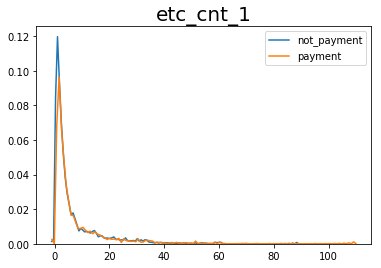

amount
0    3.479445
1    3.420136
Name: etc_cnt_1, dtype: float64 




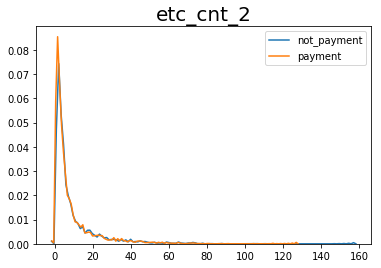

amount
0    4.652562
1    4.537070
Name: etc_cnt_2, dtype: float64 




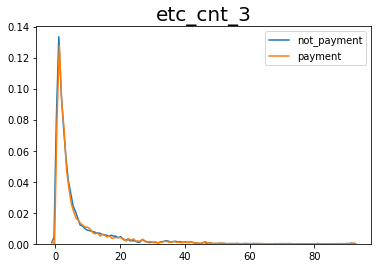

amount
0    3.516094
1    3.431133
Name: etc_cnt_3, dtype: float64 




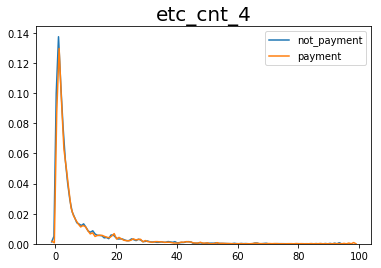

amount
0    3.894866
1    3.861751
Name: etc_cnt_4, dtype: float64 




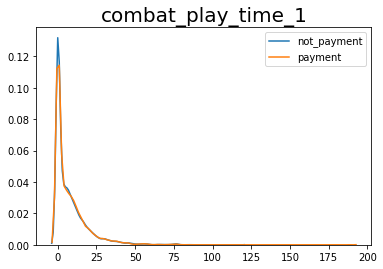

amount
0    7.535609
1    7.506436
Name: combat_play_time_1, dtype: float64 




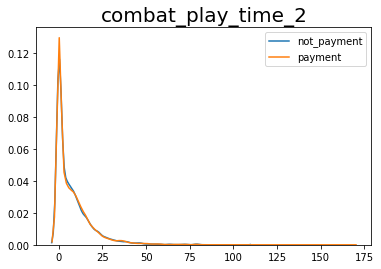

amount
0    7.769456
1    7.733023
Name: combat_play_time_2, dtype: float64 




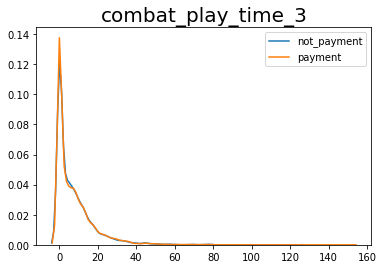

amount
0    7.452892
1    7.370934
Name: combat_play_time_3, dtype: float64 




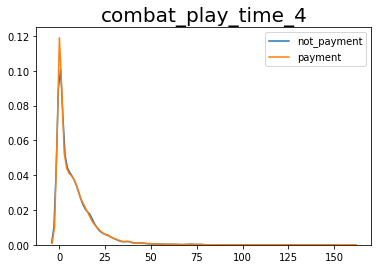

amount
0    7.990117
1    7.954844
Name: combat_play_time_4, dtype: float64 




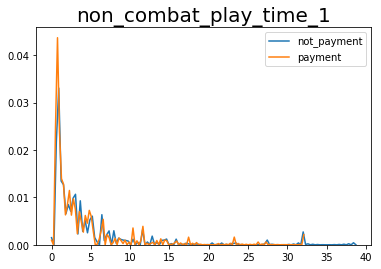

amount
0    0.256095
1    0.238781
Name: non_combat_play_time_1, dtype: float64 




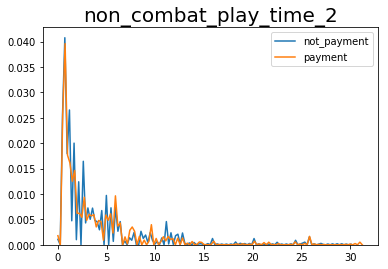

amount
0    0.251482
1    0.241296
Name: non_combat_play_time_2, dtype: float64 




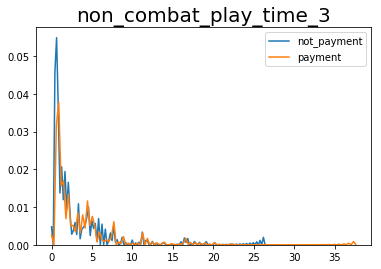

amount
0    0.222448
1    0.229863
Name: non_combat_play_time_3, dtype: float64 




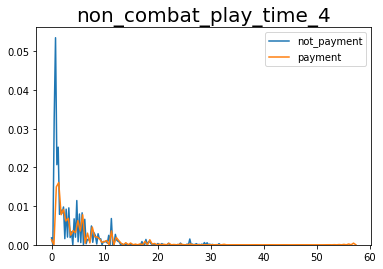

amount
0    0.268287
1    0.275551
Name: non_combat_play_time_4, dtype: float64 




In [280]:
for i in range(1, 121):
    column = data.columns[i]
    sns.kdeplot(data.loc[data['amount'] == 0, column], label = 'not_payment')
    sns.kdeplot(data.loc[data['amount'] == 1, column], label = 'payment')
    plt.title(column, fontsize = 20)
    plt.show()
    print(data.groupby('amount')[column].mean(), '\n\n')

In [4]:
data.head()

acc_id  playtime_1  playtime_2  playtime_3  playtime_4  npc_kill_1  \
0     2.0   22.919696   22.980553   22.659883   22.973531    0.000000   
1     5.0    0.000000    0.589845    0.213000    5.313287    0.000000   
2     8.0    4.987936    4.889629    4.653223    4.267014   26.808113   
3    17.0    5.406914    9.048973    7.831832    6.176989   25.931158   
4    21.0    6.048253    7.363701    4.966870    3.452466    4.379366   

   npc_kill_2  npc_kill_3  npc_kill_4  solo_exp_1  ...  combat_play_time_3  \
0    0.000000    0.000000    0.000000    0.000000  ...            0.000000   
1    0.310229    0.162887    2.763336    0.000000  ...            0.593982   
2    1.325063    1.444694    1.594739   28.720862  ...           33.515247   
3    1.328780    1.362575    1.834339    4.197880  ...           14.629460   
4    4.602406    0.654252    1.135141   14.917062  ...            0.149190   

   combat_play_time_4  non_combat_play_time_1  non_combat_play_time_2  \
0            0.000000                0.000000                0.000000   
1            3.661882                0.000000                0.000000   
2           29.782361                0.021776                0.000347   
3           15.140507                0.000000                0.000000   
4            0.087337                0.079228                0.408073   

   non_combat_play_time_3  non_combat_play_time_4  survival_time  \
0                0.000000                0.000000             57   
1                0.000000                0.004402             64   
2                0.010656                0.001042             10   
3                0.000000                0.000000              6   
4                0.218226                0.169577             22   

   amount_spent  leave  amount  
0      0.018834      1       1  
1      0.023066      0       1  
2      0.000000      1       0  
3      0.010926      1       1  
4      0.000000      1       0  

[5 rows x 125 columns]

In [4]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_train = minMaxScaler.fit_transform(data.iloc[:, 1:121])
X_train

array([[9.88791275e-01, 9.88422430e-01, 9.82742869e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.53699789e-02, 9.23764085e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.67644201e-05],
       [2.15187317e-01, 2.10309071e-01, 2.01806923e-01, ...,
        1.11180290e-05, 2.83215481e-04, 1.81810469e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.75320610e-01, 7.05325682e-01, 2.62206883e-01, ...,
        7.41201933e-06, 9.23528742e-06, 4.10891659e-03],
       [2.32353832e-01, 2.03161180e-01, 3.19459953e-01, ...,
        3.29834860e-04, 1.23445008e-03, 2.68675470e-04]])

In [5]:
y_train_leave = data.iloc[:, 123]
y_train_amount = data.iloc[:, 124]

In [6]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

input = Input(shape = (X_train.shape[1], ))

fc1 = Dense(1024, activation='relu')(input)
fc2 = Dense(512, activation='relu')(fc1)
fc3 = Dense(256, activation='relu')(fc2)
fc4 = Dense(128, activation='relu')(fc3)
fc4_drop = Dropout(0.3)(fc4)
fc5 = Dense(64, activation='relu')(fc4_drop)
fc5_drop = Dropout(0.3)(fc5)
fc6 = Dense(32, activation='relu')(fc5_drop)

leave_out = Dense(1, activation='sigmoid', name='leave_output')(fc6)
amount_out = Dense(1, activation='sigmoid', name='amount_output')(fc6)

model = Model(inputs = input, outputs = [leave_out, amount_out])
model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1024)         123904      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 512)          524800      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 256)          131328      dense_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [14]:
from keras.utils import multi_gpu_model

model = multi_gpu_model(model, gpus=8, cpu_relocation = True)

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(optimizer = 'rmsprop', loss = {'leave_output' : 'binary_crossentropy', 'amount_output' : 'binary_crossentropy'},
              metrics = {'leave_output' : 'acc', 'amount_output' : 'acc'})

callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 20),
                 ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)]

history = model.fit(X_train, [y_train_leave, y_train_amount],
                    epochs = 150, batch_size = 128, 
                    callbacks = callbacks_list,
                    validation_split = 0.2,
                    shuffle = True)

Train on 24000 samples, validate on 6000 samples
Epoch 1/150


InternalError: Blas GEMM launch failed : a.shape=(128, 120), b.shape=(120, 1024), m=128, n=1024, k=120
	 [[{{node dense_1/MatMul}} = MatMul[T=DT_FLOAT, _class=["loc:@training/RMSprop/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_input_1_0_0/_81, dense_1/kernel/read)]]
	 [[{{node metrics/acc/Mean_1/_125}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1221_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [174]:
amount_cnt = X_train3.groupby('acc_id')['amount_spent_x'].count()
amount_mean = X_train3.groupby('acc_id')['amount_spent_x'].sum() / X_train3.groupby('acc_id')['amount_spent_x'].count()

In [175]:
acc_id_sorted = np.sort(X_train3['acc_id'].unique())

In [176]:
amount_cnt.values

array([2, 2, 3, ..., 1, 2, 3])

In [177]:
amount_data = np.concatenate([acc_id_sorted.reshape(-1, 1), amount_cnt.values.reshape(-1, 1), amount_mean.values.reshape(-1, 1)], axis = 1)
amount_data = pd.DataFrame(amount_data)
amount_data.columns = ['acc_id', 'amount_cnt', 'amount_mean']
amount_data.head()

acc_id  amount_cnt  amount_mean
0     8.0         2.0     0.702322
1    21.0         2.0     1.347730
2    38.0         3.0     2.103250
3    41.0         1.0     0.035204
4    43.0         1.0     3.696431

In [180]:
data = pd.merge(data, amount_data, how = 'left', on = 'acc_id')

In [181]:
data = data.fillna(0)

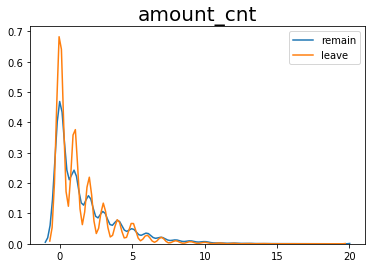

In [182]:
sns.kdeplot(data.loc[data['leave'] == 0, 'amount_cnt'], label = 'remain')
sns.kdeplot(data.loc[data['leave'] == 1, 'amount_cnt'], label = 'leave')
plt.title('amount_cnt', fontsize = 20)
plt.show()

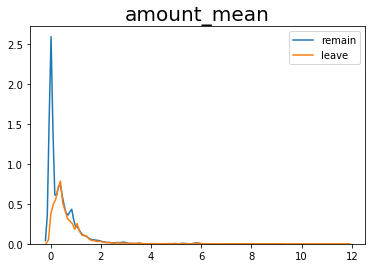

In [183]:
sns.kdeplot(data.loc[data['leave'] == 0, 'amount_mean'], label = 'remain')
sns.kdeplot(data.loc[data['leave'] == 1, 'amount_mean'], label = 'leave')
plt.title('amount_mean', fontsize = 20)
plt.show()

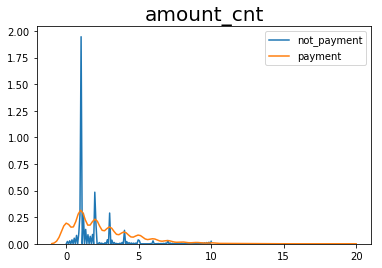

In [184]:
sns.kdeplot(data.loc[data['amount'] == 0, 'amount_cnt'], label = 'not_payment')
sns.kdeplot(data.loc[data['amount'] == 1, 'amount_cnt'], label = 'payment')
plt.title('amount_cnt', fontsize = 20)
plt.show()

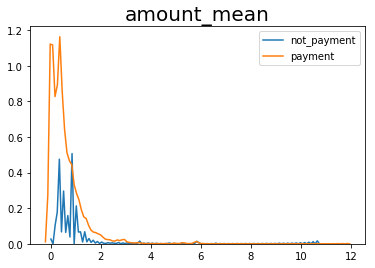

In [185]:
sns.kdeplot(data.loc[data['amount'] == 0, 'amount_mean'], label = 'not_payment')
sns.kdeplot(data.loc[data['amount'] == 1, 'amount_mean'], label = 'payment')
plt.title('amount_mean', fontsize = 20)
plt.show()

In [227]:
train_id = np.sort(train_id)
char_list = []
acc_char_matrix = X_train2.groupby(['acc_id', 'char_id']).count()['day']

for i in train_id:
    char_list.append(np.argmax(acc_char_matrix[i]))

In [228]:
len(char_list)

30000

In [229]:
server_list = []
class_list = []
level_list = []

for i in char_list:
    X_train2_sub = X_train2[X_train2['char_id'] == i]
    char_server = X_train2_sub['server'].values[-1]
    char_class = X_train2_sub['class'].values[-1]
    char_level = X_train2_sub['level'].values[-1]
    server_list.append(char_server)
    class_list.append(char_class)
    level_list.append(char_level)

In [231]:
len(server_list), len(class_list), len(level_list)

(30000, 30000, 30000)

In [237]:
char_data = np.concatenate([np.array(train_id).reshape(-1, 1), np.array(server_list).reshape(-1, 1),
                            np.array(class_list).reshape(-1, 1), np.array(level_list).reshape(-1, 1)], axis = 1)
char_data = pd.DataFrame(char_data)
char_data.columns = ['acc_id', 'server', 'class', 'level']
char_data.head()

acc_id server class level
0      2     au     1     0
1      5     aq     2    15
2      8     ao     4    16
3     17     aq     1    16
4     21     ay     0    16

In [242]:
char_data['acc_id'] = char_data['acc_id'].astype('float64')
data = pd.merge(data, char_data, how = 'left', on = 'acc_id')
data.head()

acc_id  playtime_1  playtime_2  playtime_3  playtime_4  npc_kill_1  \
0     2.0   22.919696   22.980553   22.659883   22.973531    0.000000   
1     5.0    0.000000    0.589845    0.213000    5.313287    0.000000   
2     8.0    4.987936    4.889629    4.653223    4.267014   26.808113   
3    17.0    5.406914    9.048973    7.831832    6.176989   25.931158   
4    21.0    6.048253    7.363701    4.966870    3.452466    4.379366   

   npc_kill_2  npc_kill_3  npc_kill_4  solo_exp_1  ...  \
0    0.000000    0.000000    0.000000    0.000000  ...   
1    0.310229    0.162887    2.763336    0.000000  ...   
2    1.325063    1.444694    1.594739   28.720862  ...   
3    1.328780    1.362575    1.834339    4.197880  ...   
4    4.602406    0.654252    1.135141   14.917062  ...   

   non_combat_play_time_4  survival_time  amount_spent  leave  amount  \
0                0.000000             64      0.000000      0       0   
1                0.004402             60      0.000000      1       0   
2                0.001042             64      0.020310      0       1   
3                0.000000             64      0.070642      0       1   
4                0.169577             64      0.184267      0       1   

   amount_cnt  amount_mean  server  class  level  
0         0.0     0.000000      au      1      0  
1         0.0     0.000000      aq      2     15  
2         2.0     0.702322      ao      4     16  
3         0.0     0.000000      aq      1     16  
4         2.0     1.347730      ay      0     16  

[5 rows x 130 columns]

In [254]:
data = pd.concat([data.iloc[:, 0], data.iloc[:, -3:], data.iloc[:, 1:-9], data.iloc[:, -5:-3], data.iloc[:, -9:-5]], axis = 1)

In [256]:
data.to_csv('data2.csv', index = False)